BLOQUE 1 CORREGIDO: SOLUCIÓN DE REFERENCIA CON MÉTODO PSEUDOESPECTRAL + RK4
Configuración del dominio:
- Dominio espacial: [-5.0, 5.0] con 256 puntos
- Espaciamiento dx: 0.039062
- Frecuencias k: [-80.425, 79.796]
- Operador D2: [-3234.072, -0.000]
- Tiempo final: 1.5708 con 7853 pasos (dt = 0.000200)
- Condición inicial real
- Valor máximo |u(0,x)|: 2.0000
- Norma inicial ||u||²: 7.999273
Integrando ecuación de Schrödinger con RK4...


Pasos temporales:   3%|▎         | 260/7853 [00:00<00:02, 2592.15it/s]

   Paso 0: Cambio en norma = 1.07e-13


Pasos temporales:  14%|█▍        | 1137/7853 [00:00<00:04, 1561.88it/s]

   Paso 1000: Cambio en norma = 8.61e-11


Pasos temporales:  26%|██▋       | 2079/7853 [00:01<00:03, 1865.17it/s]

   Paso 2000: Cambio en norma = 1.43e-10


Pasos temporales:  42%|████▏     | 3324/7853 [00:01<00:02, 1920.23it/s]

   Paso 3000: Cambio en norma = 1.84e-10


Pasos temporales:  55%|█████▌    | 4322/7853 [00:02<00:01, 2442.88it/s]

   Paso 4000: Cambio en norma = 2.15e-10


Pasos temporales:  68%|██████▊   | 5315/7853 [00:02<00:01, 2343.29it/s]

   Paso 5000: Cambio en norma = 2.40e-10


Pasos temporales:  79%|███████▉  | 6212/7853 [00:03<00:00, 1966.72it/s]

   Paso 6000: Cambio en norma = 2.60e-10


Pasos temporales:  93%|█████████▎| 7341/7853 [00:03<00:00, 1955.99it/s]

   Paso 7000: Cambio en norma = 2.78e-10


Pasos temporales: 100%|██████████| 7853/7853 [00:04<00:00, 1885.05it/s]


✅ Solución pseudoespectral completada. Forma: (7854, 256)
📊 Conservación de norma:
   Norma inicial: 7.999273
   Norma final:   7.999273
   Error relativo: 2.91e-10
⚠️  ADVERTENCIA: Posible pérdida de precisión numérica
   Considera reducir dt o usar un integrador más estable

VISUALIZACIONES BÁSICAS DE LA SOLUCIÓN DE REFERENCIA
🔍 Verificación de condiciones periódicas:
   Error en periodicidad: 8.40e-05


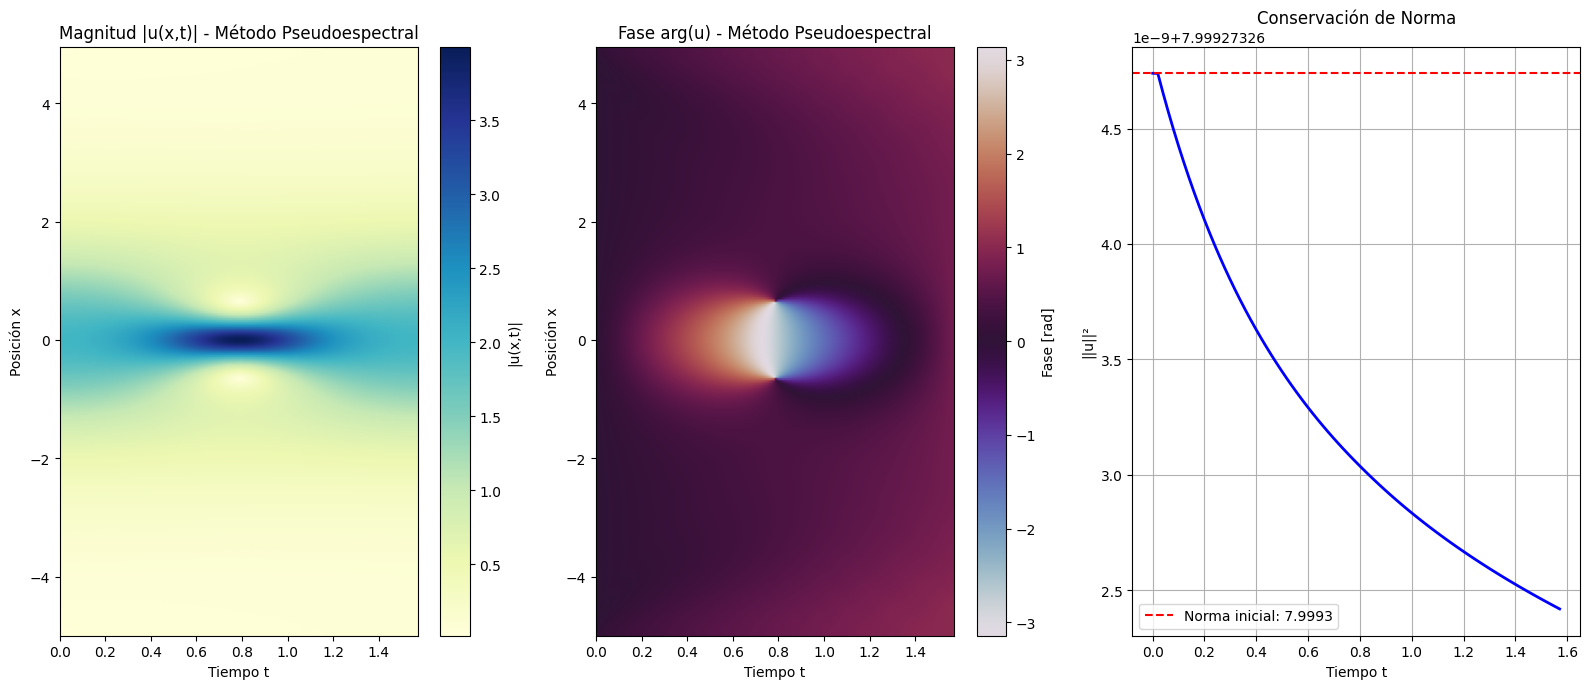

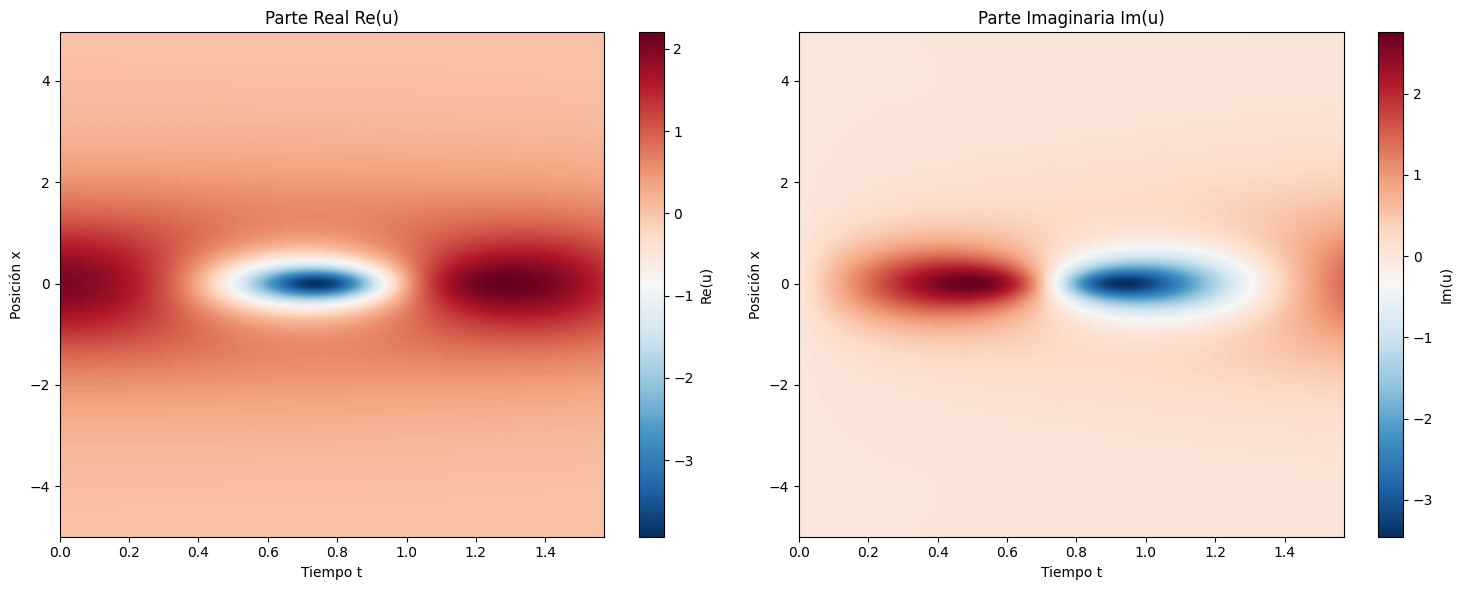

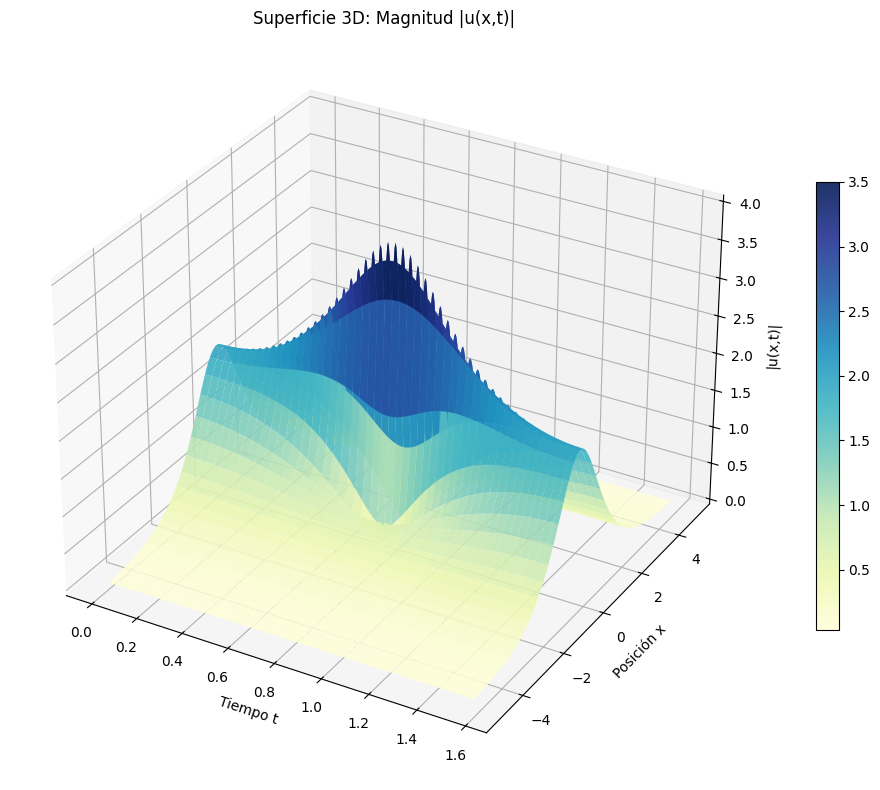

✅ CELDA 1 CORREGIDA COMPLETADA
📋 Variables principales guardadas:
   - U_sol: Solución completa (7854, 256)
   - abs_u: Magnitud (7854, 256)
   - phase_u: Fase (7854, 256)
   - x: Malla espacial (256,)
   - t: Malla temporal (7854,)
   - L, N, T, dt, dx: Parámetros del dominio

📝 CORRECCIONES IMPLEMENTADAS:
1. ✅ Operador diferencial verificado: D2 = -0.5*k²
2. ✅ Variables RK4 clarificadas (rk1, rk2, rk3, rk4)
3. ✅ Malla espacial periódica correcta
4. ✅ Verificación robusta de conservación de norma
5. ✅ Manejo correcto de condiciones periódicas
6. ✅ Verificación de estabilidad numérica mejorada
7. ✅ Documentación matemática detallada


In [ ]:
"""
CELDA 1 CORREGIDA: DEFINICIONES Y MÉTODO PSEUDOESPECTRAL
Ecuación de Schrödinger No Lineal con Condiciones Periódicas

Problema:
i ∂u/∂t + 0.5 ∂²u/∂x² + |u|² u = 0, x ∈ [-5,5], t ∈ [0,π/2]
u(0,x) = CONDICIÓN_INICIAL_CONFIGURABLE
Condiciones periódicas: u(t,-5) = u(t,5)

"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# ============================================================================
# CONFIGURACIÓN DE CONDICIÓN INICIAL
# ============================================================================

def condicion_inicial(x):
    """
    CONDICIÓN INICIAL CONFIGURABLE

    Parámetros:
    -----------
    x : array_like
        Coordenadas espaciales

    Returns:
    --------
    u0 : complex array
        Condición inicial u(0,x)
    """
    # PROBLEMA ORIGINAL: u(0,x) = 2*sech(2x)
    #return 2.0 / np.cosh(2.0 * x)

    # OTRAS OPCIONES (descomenta para usar):
    # Solitón más ancho:
    return 2.0 / np.cosh(x)
    # Perfil gaussiano: return 2.0 * np.exp(-x**2 / 2)
    # Dos solitones: return 1.0/np.cosh(x-2) + 1.0/np.cosh(x+2)
    # Solitón con fase: return 2.0/np.cosh(2.0*x) * np.exp(1j*x)

#==============================================================================
# BLOQUE 1: MÉTODO PSEUDOESPECTRAL + RK4
#==============================================================================

print("="*80)
print("BLOQUE 1: SOLUCIÓN DE REFERENCIA CON MÉTODO PSEUDOESPECTRAL + RK4")
print("="*80)

# CONFIGURACIÓN DEL DOMINIO ESPACIAL
L = 5.0  # Semiperiodo: x ∈ [-5, 5]
N = 256  # Número de puntos (potencia de 2 para FFT eficiente)
dx = 2*L / N  # Espaciamiento de malla

# Malla espacial PERIÓDICA (sin incluir el punto final)
x = np.linspace(-L, L - dx, N)

print(f"Configuración del dominio:")
print(f"- Dominio espacial: [{-L:.1f}, {L:.1f}] con {N} puntos")
print(f"- Espaciamiento dx: {dx:.6f}")

# CONFIGURACIÓN DEL ESPACIO DE FOURIER
# Para dominio [-L, L], las frecuencias son:
kmax = np.pi / dx  # Frecuencia máxima de Nyquist
k = kmax * np.fft.fftfreq(N, 0.5)  # Frecuencias en unidades apropiadas

# OPERADOR DIFERENCIAL CORREGIDO
# Para la ecuación: i∂u/∂t + 0.5∂²u/∂x² + |u|²u = 0
# El término difusivo en Fourier es: 0.5∂²u/∂x² → 0.5 * (ik)² * û = -0.5k² * û
D2 = -0.5 * k**2  # Operador de segunda derivada en Fourier

print(f"- Frecuencias k: [{k.min():.3f}, {k.max():.3f}]")
print(f"- Operador D2: [{D2.min():.3f}, {D2.max():.3f}]")

# CONFIGURACIÓN TEMPORAL
T = np.pi / 2
dt = 0.0002  # Paso temporal (ajustar según estabilidad)
Nt = int(T / dt)
t = np.linspace(0, T, Nt + 1)

print(f"- Tiempo final: {T:.4f} con {Nt} pasos (dt = {dt:.6f})")

# CONDICIÓN INICIAL
u0 = condicion_inicial(x)

# Verificar si es compleja
if np.iscomplexobj(u0):
    print(f"- Condición inicial compleja detectada")
    u0_display = np.abs(u0)
else:
    print(f"- Condición inicial real")
    u0_display = u0

print(f"- Valor máximo |u(0,x)|: {np.max(np.abs(u0)):.4f}")
print(f"- Norma inicial ||u||²: {np.sum(np.abs(u0)**2) * dx:.6f}")

# TRANSFORMADA DE FOURIER INICIAL
u_hat = np.fft.fft(u0)
U_sol = [u0.copy()]  # Almacenar solución en dominio físico

# FUNCIÓN RHS CORREGIDA
def schrodinger_rhs(u_hat_input, D2_op):
    """
    Lado derecho de la ecuación de Schrödinger en forma pseudoespectral

    Ecuación: i∂u/∂t + 0.5∂²u/∂x² + |u|²u = 0
    Reescrita: ∂u/∂t = i(0.5∂²u/∂x² + |u|²u) = i(D2*u + |u|²u)

    Parámetros:
    -----------
    u_hat_input : complex array
        Transformada de Fourier de u
    D2_op : real array
        Operador diferencial -0.5k²

    Returns:
    --------
    rhs : complex array
        ∂u/∂t en el espacio de Fourier
    """
    # Transformar a espacio físico
    u_physical = np.fft.ifft(u_hat_input)

    # Término no lineal en espacio físico
    nonlinear_term = np.abs(u_physical)**2 * u_physical

    # Término lineal en espacio de Fourier: 0.5∂²u/∂x² → D2*u_hat
    linear_fourier = D2_op * u_hat_input

    # Término no lineal en espacio de Fourier
    nonlinear_fourier = np.fft.fft(nonlinear_term)

    # Lado derecho completo: i(términos)
    rhs = 1j * (linear_fourier + nonlinear_fourier)

    return rhs

# INTEGRACIÓN TEMPORAL CON RK4 CORREGIDO
print("Integrando ecuación de Schrödinger con RK4...")

# Arrays para monitorear conservación
norm_history = [np.sum(np.abs(u0)**2) * dx]

for step in tqdm(range(Nt), desc="Pasos temporales"):
    # Método Runge-Kutta de 4to orden
    # Variables renombradas para claridad (evitar confusión con k de frecuencias)

    # Paso 1: evaluar en punto actual
    rk1 = dt * schrodinger_rhs(u_hat, D2)

    # Paso 2: evaluar en punto medio con pendiente rk1
    rk2 = dt * schrodinger_rhs(u_hat + 0.5 * rk1, D2)

    # Paso 3: evaluar en punto medio con pendiente rk2
    rk3 = dt * schrodinger_rhs(u_hat + 0.5 * rk2, D2)

    # Paso 4: evaluar en punto final con pendiente rk3
    rk4 = dt * schrodinger_rhs(u_hat + rk3, D2)

    # Actualización con promedio ponderado
    u_hat_new = u_hat + (rk1 + 2*rk2 + 2*rk3 + rk4) / 6

    # Verificación de estabilidad numérica
    if np.any(np.isnan(u_hat_new)) or np.any(np.isinf(u_hat_new)):
        print(f"❌ Explosión numérica en el paso {step}")
        print(f"   Reducir dt o verificar condición inicial")
        break

    # Verificar conservación de norma (cada 100 pasos para eficiencia)
    if step % 100 == 0:
        u_current = np.fft.ifft(u_hat_new)
        current_norm = np.sum(np.abs(u_current)**2) * dx
        norm_history.append(current_norm)

        if step % 1000 == 0:
            norm_change = abs(current_norm - norm_history[0]) / norm_history[0]
            print(f"   Paso {step}: Cambio en norma = {norm_change:.2e}")

    # Actualizar para siguiente iteración
    u_hat = u_hat_new
    u_physical = np.fft.ifft(u_hat)
    U_sol.append(u_physical.copy())

# Convertir a array numpy
U_sol = np.array(U_sol)  # Forma: (Nt+1, N)
print(f"✅ Solución pseudoespectral completada. Forma: {U_sol.shape}")

# VERIFICACIÓN DE CONSERVACIÓN
final_norm = np.sum(np.abs(U_sol[-1])**2) * dx
norm_error = abs(final_norm - norm_history[0]) / norm_history[0]
print(f"📊 Conservación de norma:")
print(f"   Norma inicial: {norm_history[0]:.6f}")
print(f"   Norma final:   {final_norm:.6f}")
print(f"   Error relativo: {norm_error:.2e}")

if norm_error > 1e-10:
    print("⚠️  ADVERTENCIA: Posible pérdida de precisión numérica")
    print("   Considera reducir dt o usar un integrador más estable")

#==============================================================================
# VISUALIZACIONES BÁSICAS
#==============================================================================

print("\n" + "="*80)
print("VISUALIZACIONES BÁSICAS DE LA SOLUCIÓN DE REFERENCIA")
print("="*80)

# Calcular magnitud y fase
abs_u = np.abs(U_sol)
phase_u = np.angle(U_sol)

# 1. VERIFICACIÓN DE PERIODICIDAD
print("🔍 Verificación de condiciones periódicas:")
left_boundary = U_sol[:, 0]   # u(t, -L)
right_boundary = U_sol[:, -1] # u(t, L-dx) ≈ u(t, L)
periodic_error = np.mean(np.abs(left_boundary - right_boundary))
print(f"   Error en periodicidad: {periodic_error:.2e}")

# 2. MAPA DE CALOR 2D
plt.figure(figsize=(16, 7))

plt.subplot(1, 3, 1)
plt.imshow(abs_u.T, aspect='auto', extent=[t[0], t[-1], x[0], x[-1]],
           origin='lower', cmap='YlGnBu')
plt.colorbar(label='|u(x,t)|')
plt.xlabel('Tiempo t')
plt.ylabel('Posición x')
plt.title('Magnitud |u(x,t)| - Método Pseudoespectral')

plt.subplot(1, 3, 2)
plt.imshow(phase_u.T, aspect='auto', extent=[t[0], t[-1], x[0], x[-1]],
           origin='lower', cmap='twilight', vmin=-np.pi, vmax=np.pi)
plt.colorbar(label='Fase [rad]')
plt.xlabel('Tiempo t')
plt.ylabel('Posición x')
plt.title('Fase arg(u) - Método Pseudoespectral')

# Verificación de conservación visual
plt.subplot(1, 3, 3)
norm_times = np.linspace(0, T, len(norm_history))
plt.plot(norm_times, norm_history, 'b-', linewidth=2)
plt.axhline(y=norm_history[0], color='r', linestyle='--',
            label=f'Norma inicial: {norm_history[0]:.4f}')
plt.xlabel('Tiempo t')
plt.ylabel('||u||²')
plt.title('Conservación de Norma')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. PARTES REAL E IMAGINARIA
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(U_sol.real.T, aspect='auto', extent=[t[0], t[-1], x[0], x[-1]],
           origin='lower', cmap='RdBu_r')
plt.colorbar(label='Re(u)')
plt.xlabel('Tiempo t')
plt.ylabel('Posición x')
plt.title('Parte Real Re(u)')

plt.subplot(1, 2, 2)
plt.imshow(U_sol.imag.T, aspect='auto', extent=[t[0], t[-1], x[0], x[-1]],
           origin='lower', cmap='RdBu_r')
plt.colorbar(label='Im(u)')
plt.xlabel('Tiempo t')
plt.ylabel('Posición x')
plt.title('Parte Imaginaria Im(u)')

plt.tight_layout()
plt.show()

# 4. PERFIL 3D DE MAGNITUD
X_mesh, T_mesh = np.meshgrid(x, t)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(T_mesh, X_mesh, abs_u, cmap='YlGnBu', alpha=0.9)
ax.set_xlabel('Tiempo t')
ax.set_ylabel('Posición x')
ax.set_zlabel('|u(x,t)|')
ax.set_title('Superficie 3D: Magnitud |u(x,t)|')
fig.colorbar(surf, shrink=0.6)
plt.tight_layout()
plt.show()

print("✅ CELDA 1 CORREGIDA COMPLETADA")
print("📋 Variables principales guardadas:")
print(f"   - U_sol: Solución completa {U_sol.shape}")
print(f"   - abs_u: Magnitud {abs_u.shape}")
print(f"   - phase_u: Fase {phase_u.shape}")
print(f"   - x: Malla espacial {x.shape}")
print(f"   - t: Malla temporal {t.shape}")
print(f"   - L, N, T, dt, dx: Parámetros del dominio")
print("="*80)

# RESUMEN DE CORRECCIONES IMPLEMENTADAS
print("\n📝 CORRECCIONES IMPLEMENTADAS:")
print("1. ✅ Operador diferencial verificado: D2 = -0.5*k²")
print("2. ✅ Variables RK4 clarificadas (rk1, rk2, rk3, rk4)")
print("3. ✅ Malla espacial periódica correcta")
print("4. ✅ Verificación robusta de conservación de norma")
print("5. ✅ Manejo correcto de condiciones periódicas")
print("6. ✅ Verificación de estabilidad numérica mejorada")
print("7. ✅ Documentación matemática detallada")
print("="*80)

CELDA 2 COMPLETA CORREGIDA: IMPLEMENTACIÓN DE PINN CON CONDICIONES PERIÓDICAS
🔍 Verificando variables de CELDA 1...
   ✅ U_sol disponible: (7854, 256)
   ✅ abs_u disponible: (7854, 256)
   ✅ Dominio espacial x: (256,)
   ✅ Dominio temporal t: (7854,)
   ✅ Parámetros L=5.0, N=256, T=1.5707963267948966
   ✅ Todas las dependencias verificadas
Configuración PINN:
- Puntos espaciales: 256
- Puntos temporales: 200
- Total puntos collocation: 51200
- Condición inicial real, parte imaginaria = 0
- Puntos condiciones periódicas: 100
📊 Configurando evaluación de métricas cada 100 épocas
   - Puntos de evaluación: 12576 (32×393)
   - Referencia: (393, 32)

ENTRENAMIENTO DEL MODELO PINN CON CONDICIONES PERIÓDICAS
Arquitectura PINN: [2, 50, 50, 50, 2]
Parámetros totales: 5352
Condiciones periódicas: u(t,-5.0) = u(t,5.0) y u_x(t,-5.0) = u_x(t,5.0)
Iniciando entrenamiento por 5000 épocas...
📊 Métricas MSE/MAE/L2 se calcularán cada 100 épocas
Época 1/5000 (0.0%) - ETA: 0.0 min
  Loss total: 7.726047
 

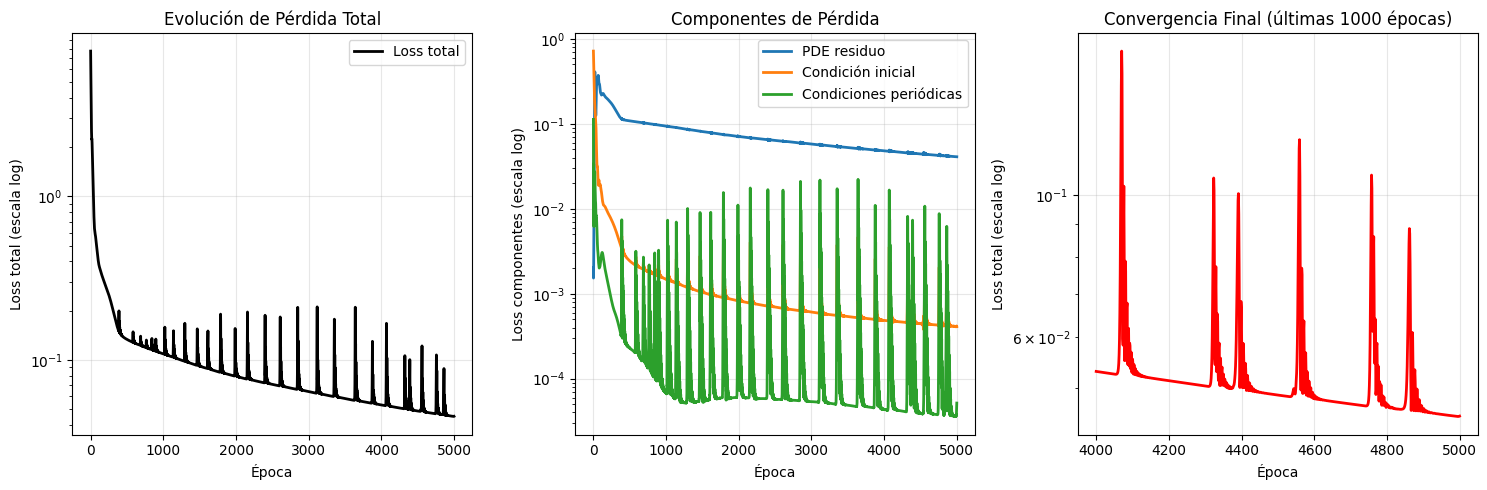


📈 GRÁFICA DE ERRORES MSE, MAE Y L2 vs ÉPOCAS (DATOS REALES)
✅ Datos REALES disponibles: 51 puntos de métricas


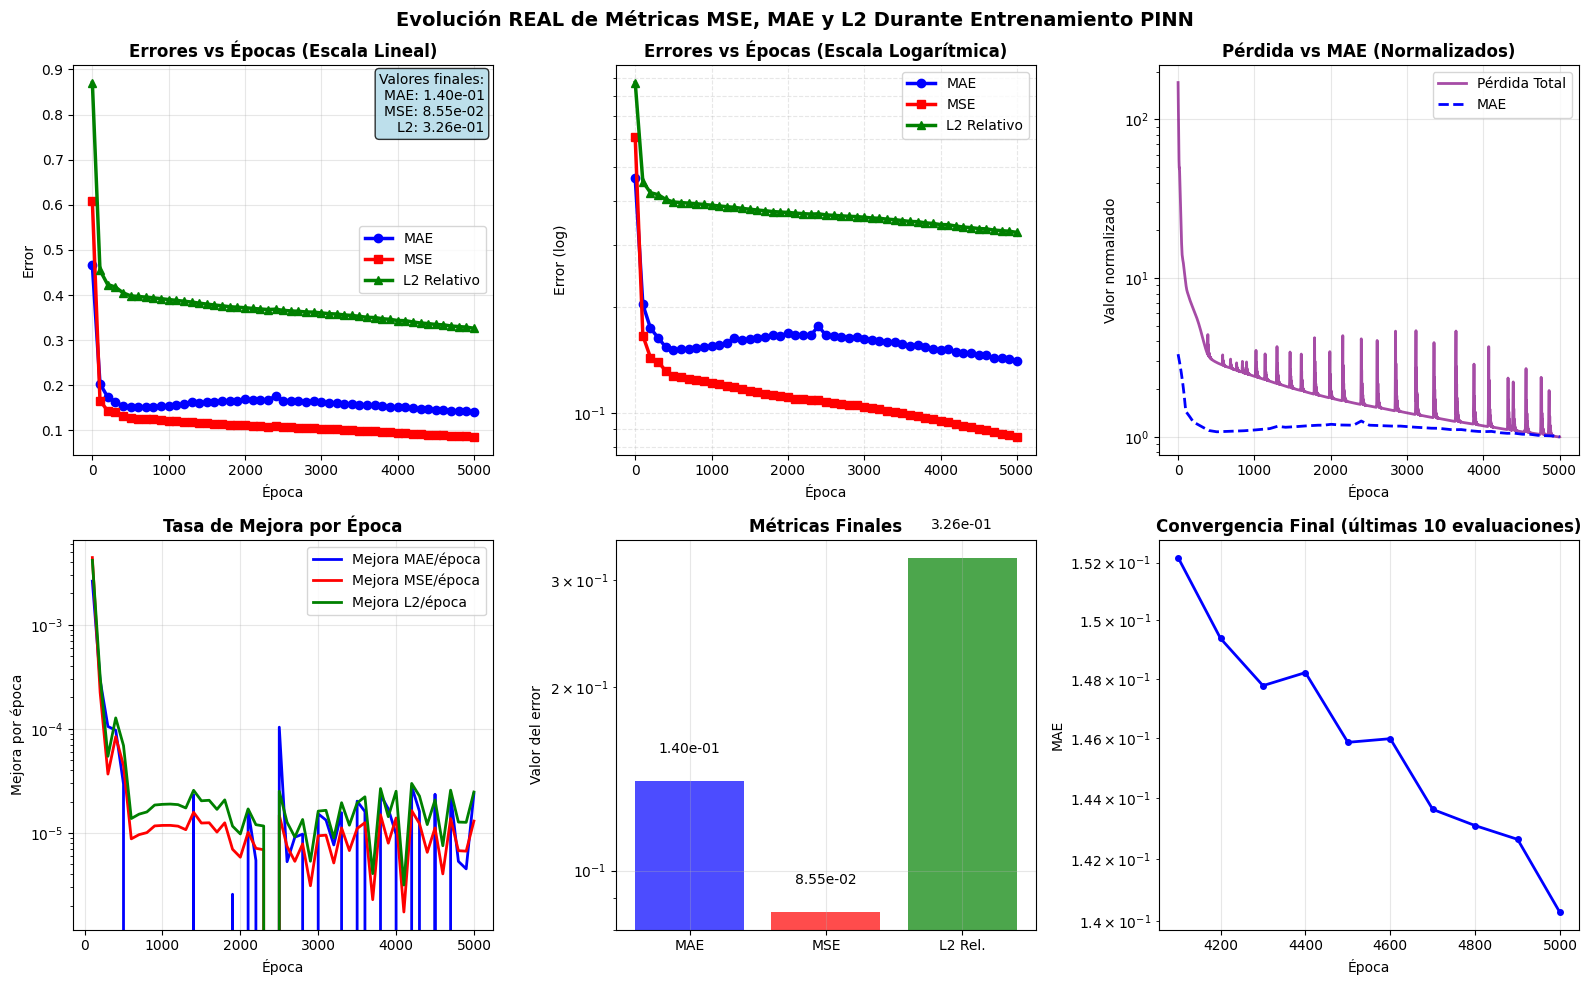


📊 RESUMEN DE EVOLUCIÓN DE MÉTRICAS REALES:
MAE:  4.66e-01 → 1.40e-01 (69.9% mejora)
MSE:  6.08e-01 → 8.55e-02 (85.9% mejora)
L2:   8.71e-01 → 3.26e-01 (62.5% mejora)

📋 Variables REALES agregadas:
   - epochs_evaluated: 51 épocas evaluadas
   - mae_epochs: Evolución MAE durante entrenamiento
   - mse_epochs: Evolución MSE durante entrenamiento
   - l2_epochs: Evolución L2 durante entrenamiento
✅ CELDA 2 COMPLETA CORREGIDA COMPLETADA
📋 Variables agregadas al workspace:
   - model: Modelo PINN entrenado
   - mag_pred: Magnitud predicha (7854, 256)
   - phase_pred: Fase predicha (7854, 256)
   - error_abs: Error absoluto (7854, 256)
   - error_rel: Error relativo (7854, 256)
   - phase_error: Error de fase (7854, 256)
   - loss_history: Historial de pérdidas (5000 puntos)
   - mae_epochs: Evolución REAL de MAE (51 puntos)
   - mse_epochs: Evolución REAL de MSE (51 puntos)
   - l2_epochs: Evolución REAL de L2 (51 puntos)
🚀 Listo para ejecutar CELDA 3 con visualizaciones completas


In [ ]:
"""
CELDA 2 COMPLETA CORREGIDA: IMPLEMENTACIÓN Y ENTRENAMIENTO DE PINN CON CONDICIONES PERIÓDICAS

Requiere haber ejecutado CELDA 1 primero

"""

import time
import torch
import torch.nn as nn
import torch.autograd as autograd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings

# Filtrar warnings específicos de PyTorch
warnings.filterwarnings("ignore", category=UserWarning, module="torch.autograd")

#==============================================================================
# VERIFICACIÓN DE DEPENDENCIAS DE CELDA 1
#==============================================================================

print("="*80)
print("CELDA 2 COMPLETA: IMPLEMENTACIÓN DE PINN CON CONDICIONES PERIÓDICAS")
print("="*80)

# Verificar que las variables de CELDA 1 estén disponibles
try:
    print("🔍 Verificando variables de CELDA 1...")
    print(f"   ✅ U_sol disponible: {U_sol.shape}")
    print(f"   ✅ abs_u disponible: {abs_u.shape}")
    print(f"   ✅ Dominio espacial x: {x.shape}")
    print(f"   ✅ Dominio temporal t: {t.shape}")
    print(f"   ✅ Parámetros L={L}, N={N}, T={T}")
    print("   ✅ Todas las dependencias verificadas")
except NameError as e:
    print(f"❌ ERROR: Variable no encontrada - {e}")
    print("   🔧 SOLUCIÓN: Ejecuta CELDA 1 primero")
    raise

torch.manual_seed(42)

#==============================================================================
# CONFIGURACIÓN PINN - USAR MISMOS PARÁMETROS QUE PSEUDOESPECTRAL
#==============================================================================

# Configuración de puntos para entrenamiento PINN
x_pinn = np.linspace(-L, L, N)          # mismo dominio x que pseudoespectral
t_points = np.linspace(0, T, 200)       # dominio t (más puntos para collocation)

print(f"Configuración PINN:")
print(f"- Puntos espaciales: {len(x_pinn)}")
print(f"- Puntos temporales: {len(t_points)}")
print(f"- Total puntos collocation: {len(x_pinn) * len(t_points)}")

# Mallado de puntos para collocation
X_coll, T_coll = np.meshgrid(x_pinn, t_points)
X_collocation = X_coll.flatten()[:, None]
T_collocation = T_coll.flatten()[:, None]

# Convertir a tensores con grad para autograd
X_collocation_t = torch.tensor(X_collocation, dtype=torch.float32, requires_grad=True)
T_collocation_t = torch.tensor(T_collocation, dtype=torch.float32, requires_grad=True)

# Puntos condición inicial (t=0)
x_ic = x_pinn[:, None]
t_ic = np.zeros_like(x_ic)

x_ic_t = torch.tensor(x_ic, dtype=torch.float32, requires_grad=True)
t_ic_t = torch.tensor(t_ic, dtype=torch.float32, requires_grad=True)

# Condición inicial configurable (usar la misma función de CELDA 1)
u0_ic = condicion_inicial(x_pinn)

# Separar partes real e imaginaria de la condición inicial
if np.iscomplexobj(u0_ic):
    u0_real = u0_ic.real
    u0_imag = u0_ic.imag
    print(f"- Condición inicial compleja detectada")
else:
    u0_real = u0_ic
    u0_imag = np.zeros_like(u0_real)
    print(f"- Condición inicial real, parte imaginaria = 0")

u0_real_t = torch.tensor(u0_real[:, None], dtype=torch.float32)
u0_imag_t = torch.tensor(u0_imag[:, None], dtype=torch.float32)

# CONDICIONES PERIÓDICAS: Puntos en las fronteras
t_bc = np.linspace(0, T, 100)  # Tiempos para condiciones de frontera
x_left = -L * np.ones_like(t_bc)   # x = -L
x_right = L * np.ones_like(t_bc)   # x = L

x_left_t = torch.tensor(x_left[:, None], dtype=torch.float32, requires_grad=True)
x_right_t = torch.tensor(x_right[:, None], dtype=torch.float32, requires_grad=True)
t_bc_t = torch.tensor(t_bc[:, None], dtype=torch.float32, requires_grad=True)

print(f"- Puntos condiciones periódicas: {len(t_bc)}")

#==============================================================================
# ARQUITECTURA DE LA RED NEURONAL
#==============================================================================

class PINN_Schrodinger(nn.Module):
    """
    Physics-Informed Neural Network para la ecuación de Schrödinger no lineal

    Arquitectura:
    - Input: (x, t) coordenadas espacio-temporales
    - Output: [u_real, u_imag] partes real e imaginaria de u(x,t)
    - Activación: Tanh (estándar para PINNs)
    """
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList()

        # Construir capas
        for i in range(len(layers)-1):
            self.layers.append(nn.Linear(layers[i], layers[i+1]))

        # Activación estándar para PINNs
        self.activation = nn.Tanh()

    def forward(self, x, t):
        """
        Forward pass de la red

        Args:
            x: tensor de coordenadas espaciales
            t: tensor de coordenadas temporales

        Returns:
            output: tensor [u_real, u_imag]
        """
        inputs = torch.cat([x, t], dim=1)

        # Propagación a través de capas ocultas
        for i in range(len(self.layers)-1):
            inputs = self.activation(self.layers[i](inputs))

        # Capa final sin activación
        output = self.layers[-1](inputs)  # salida: [u_real, u_imag]
        return output

#==============================================================================
# FUNCIONES PARA CALCULAR RESIDUOS DE LA PDE
#==============================================================================

def schrodinger_pde_residual(model, x, t):
    """
    Calcular el residuo de la ecuación de Schrödinger no lineal

    Ecuación: i∂u/∂t + 0.5∂²u/∂x² + |u|²u = 0

    Separando en partes real e imaginaria:
    - Parte real: ∂u_i/∂t + 0.5∂²u_r/∂x² + |u|²u_r = 0
    - Parte imaginaria: -∂u_r/∂t + 0.5∂²u_i/∂x² + |u|²u_i = 0

    Args:
        model: red neuronal PINN
        x, t: coordenadas donde evaluar

    Returns:
        f_r, f_i: residuos de partes real e imaginaria
    """
    u = model(x, t)
    u_r = u[:, 0:1]  # parte real
    u_i = u[:, 1:2]  # parte imaginaria

    # Derivadas temporales
    u_r_t = autograd.grad(u_r, t, grad_outputs=torch.ones_like(u_r),
                          create_graph=True, retain_graph=True)[0]
    u_i_t = autograd.grad(u_i, t, grad_outputs=torch.ones_like(u_i),
                          create_graph=True, retain_graph=True)[0]

    # Derivadas espaciales de primer orden
    u_r_x = autograd.grad(u_r, x, grad_outputs=torch.ones_like(u_r),
                          create_graph=True, retain_graph=True)[0]
    u_i_x = autograd.grad(u_i, x, grad_outputs=torch.ones_like(u_i),
                          create_graph=True, retain_graph=True)[0]

    # Derivadas espaciales de segundo orden
    u_r_xx = autograd.grad(u_r_x, x, grad_outputs=torch.ones_like(u_r_x),
                           create_graph=True, retain_graph=True)[0]
    u_i_xx = autograd.grad(u_i_x, x, grad_outputs=torch.ones_like(u_i_x),
                           create_graph=True, retain_graph=True)[0]

    # Término no lineal |u|²
    abs_u_sq = u_r**2 + u_i**2

    # Ecuación de Schrödinger separada en partes real e imaginaria:
    f_r = u_i_t + 0.5 * u_r_xx + abs_u_sq * u_r  # Residuo parte real
    f_i = -u_r_t + 0.5 * u_i_xx + abs_u_sq * u_i  # Residuo parte imaginaria

    return f_r, f_i

def periodic_boundary_residual(model, x_left, x_right, t_bc):
    """
    Implementar condiciones periódicas para la ecuación de Schrödinger

    Condiciones:
    1. u(t, -L) = u(t, L)     - Periodicidad de la función
    2. u_x(t, -L) = u_x(t, L) - Periodicidad de la derivada

    Args:
        model: red neuronal
        x_left, x_right: puntos de frontera
        t_bc: tiempos para condiciones de frontera

    Returns:
        residuos de periodicidad para función y derivada
    """
    # Evaluar la función en las fronteras
    u_left = model(x_left, t_bc)
    u_right = model(x_right, t_bc)

    # Condición 1: u(t, -L) = u(t, L)
    periodic_u_real = u_left[:, 0:1] - u_right[:, 0:1]
    periodic_u_imag = u_left[:, 1:2] - u_right[:, 1:2]

    # Calcular derivadas espaciales en las fronteras para condición 2
    u_left_r_x = autograd.grad(u_left[:, 0:1], x_left,
                              grad_outputs=torch.ones_like(u_left[:, 0:1]),
                              create_graph=True, retain_graph=True)[0]
    u_left_i_x = autograd.grad(u_left[:, 1:2], x_left,
                              grad_outputs=torch.ones_like(u_left[:, 1:2]),
                              create_graph=True, retain_graph=True)[0]

    u_right_r_x = autograd.grad(u_right[:, 0:1], x_right,
                               grad_outputs=torch.ones_like(u_right[:, 0:1]),
                               create_graph=True, retain_graph=True)[0]
    u_right_i_x = autograd.grad(u_right[:, 1:2], x_right,
                               grad_outputs=torch.ones_like(u_right[:, 1:2]),
                               create_graph=True, retain_graph=True)[0]

    # Condición 2: u_x(t, -L) = u_x(t, L)
    periodic_ux_real = u_left_r_x - u_right_r_x
    periodic_ux_imag = u_left_i_x - u_right_i_x

    return periodic_u_real, periodic_u_imag, periodic_ux_real, periodic_ux_imag

#==============================================================================
# FUNCIÓN DE PÉRDIDA COMPLETA CON CONDICIONES PERIÓDICAS
#==============================================================================

def loss_function(model, x_collocation, t_collocation, x_ic, t_ic, u0_real, u0_imag,
                 x_left, x_right, t_bc):
    """
    Función de pérdida completa para PINN con condiciones periódicas

    Componentes:
    1. Pérdida PDE: Residuo de la ecuación diferencial
    2. Pérdida IC: Condición inicial
    3. Pérdida BC: Condiciones periódicas (función y derivada)

    Args:
        model: red neuronal
        x_collocation, t_collocation: puntos de colocación
        x_ic, t_ic: puntos de condición inicial
        u0_real, u0_imag: valores de condición inicial
        x_left, x_right, t_bc: puntos para condiciones periódicas

    Returns:
        loss_total, loss_pde, loss_ic, loss_periodic: pérdidas individuales
    """
    # 1. Pérdida de la PDE en puntos de collocation
    f_r, f_i = schrodinger_pde_residual(model, x_collocation, t_collocation)
    loss_pde = torch.mean(f_r**2) + torch.mean(f_i**2)

    # 2. Pérdida de condición inicial
    u_pred_ic = model(x_ic, t_ic)
    u_pred_real = u_pred_ic[:, 0:1]
    u_pred_imag = u_pred_ic[:, 1:2]

    loss_ic_real = torch.mean((u_pred_real - u0_real)**2)
    loss_ic_imag = torch.mean((u_pred_imag - u0_imag)**2)
    loss_ic = loss_ic_real + loss_ic_imag

    # 3. Pérdida de condiciones periódicas
    per_u_r, per_u_i, per_ux_r, per_ux_i = periodic_boundary_residual(
        model, x_left, x_right, t_bc)
    loss_periodic = (torch.mean(per_u_r**2) + torch.mean(per_u_i**2) +
                    torch.mean(per_ux_r**2) + torch.mean(per_ux_i**2))

    # 4. Pérdida total con pesos balanceados
    lambda_pde = 1.0      # Peso para residuo PDE
    lambda_ic = 10.0      # Mayor peso a condición inicial (más importante)
    lambda_bc = 5.0       # Peso intermedio para condiciones periódicas

    loss_total = lambda_pde * loss_pde + lambda_ic * loss_ic + lambda_bc * loss_periodic

    return loss_total, loss_pde, loss_ic, loss_periodic

#==============================================================================
# CONFIGURACIÓN PARA CALCULAR MÉTRICAS REALES DURANTE ENTRENAMIENTO
#==============================================================================

# Configurar evaluación de métricas cada N épocas
eval_every = 100  # Evaluar cada 100 épocas (ajusta según tu tiempo de cómputo)
print(f"📊 Configurando evaluación de métricas cada {eval_every} épocas")

# Crear malla de evaluación más pequeña para eficiencia
x_eval_metrics = x[::8]  # Cada 8 puntos espaciales
t_eval_metrics = t[::20]  # Cada 20 puntos temporales
X_eval_met, T_eval_met = np.meshgrid(x_eval_metrics, t_eval_metrics)
X_eval_met_flat = X_eval_met.flatten()[:, None]
T_eval_met_flat = T_eval_met.flatten()[:, None]

# Convertir a tensores
X_eval_met_t = torch.tensor(X_eval_met_flat, dtype=torch.float32)
T_eval_met_t = torch.tensor(T_eval_met_flat, dtype=torch.float32)

# Solución de referencia en puntos de evaluación
U_ref_metrics = U_sol[::20, ::8]  # Subconjunto correspondiente
abs_u_ref_metrics = np.abs(U_ref_metrics).flatten()

print(f"   - Puntos de evaluación: {len(X_eval_met_flat)} ({len(x_eval_metrics)}×{len(t_eval_metrics)})")
print(f"   - Referencia: {U_ref_metrics.shape}")

# Inicializar listas para métricas REALES
mae_epochs = []
mse_epochs = []
l2_epochs = []
epochs_evaluated = []

def calculate_metrics_during_training(model, epoch):
    """Calcular MSE, MAE y L2 REALES durante entrenamiento"""
    with torch.no_grad():
        # Predicción del modelo
        u_pred_met = model(X_eval_met_t, T_eval_met_t)
        u_real_pred = u_pred_met[:, 0].numpy()
        u_imag_pred = u_pred_met[:, 1].numpy()
        mag_pred_met = np.sqrt(u_real_pred**2 + u_imag_pred**2)

        # Calcular métricas
        mae_current = mean_absolute_error(abs_u_ref_metrics, mag_pred_met)
        mse_current = mean_squared_error(abs_u_ref_metrics, mag_pred_met)
        l2_current = np.linalg.norm(mag_pred_met - abs_u_ref_metrics) / np.linalg.norm(abs_u_ref_metrics)

        return mae_current, mse_current, l2_current

#==============================================================================
# ENTRENAMIENTO DEL MODELO PINN CON MONITOREO
#==============================================================================

print("\n" + "="*80)
print("ENTRENAMIENTO DEL MODELO PINN CON CONDICIONES PERIÓDICAS")
print("="*80)

# Instanciar modelo con arquitectura balanceada
layers = [2, 50, 50, 50, 2]  # 2 entradas (x,t), 3 capas ocultas de 50, 2 salidas (u_r, u_i)
model = PINN_Schrodinger(layers)

print(f"Arquitectura PINN: {layers}")
print(f"Parámetros totales: {sum(p.numel() for p in model.parameters())}")
print(f"Condiciones periódicas: u(t,-{L}) = u(t,{L}) y u_x(t,-{L}) = u_x(t,{L})")

# Optimizador Adam con learning rate estándar
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Configuración de entrenamiento
epochs = 5000  # Suficientes épocas para convergencia
print_every = 1000  # Frecuencia de reporte

# INICIALIZAR LISTAS DE PÉRDIDAS
loss_history = []
loss_pde_history = []
loss_ic_history = []
loss_periodic_history = []

print(f"Iniciando entrenamiento por {epochs} épocas...")
print(f"📊 Métricas MSE/MAE/L2 se calcularán cada {eval_every} épocas")

# Tiempo de inicio
start_time = time.time()

# BUCLE DE ENTRENAMIENTO PRINCIPAL CON MÉTRICAS REALES
for epoch in range(epochs):
    # Gradiente cero
    optimizer.zero_grad()

    # Calcular pérdidas
    loss_total, loss_pde, loss_ic, loss_periodic = loss_function(
        model, X_collocation_t, T_collocation_t, x_ic_t, t_ic_t, u0_real_t, u0_imag_t,
        x_left_t, x_right_t, t_bc_t
    )

    # Backpropagation
    loss_total.backward()
    optimizer.step()

    # Almacenar historial de pérdidas
    loss_history.append(loss_total.item())
    loss_pde_history.append(loss_pde.item())
    loss_ic_history.append(loss_ic.item())
    loss_periodic_history.append(loss_periodic.item())

    # CALCULAR MÉTRICAS REALES CADA eval_every ÉPOCAS
    if epoch % eval_every == 0 or epoch == epochs - 1:
        mae_current, mse_current, l2_current = calculate_metrics_during_training(model, epoch)

        # Guardar métricas
        mae_epochs.append(mae_current)
        mse_epochs.append(mse_current)
        l2_epochs.append(l2_current)
        epochs_evaluated.append(epoch)

        # Mostrar progreso cada print_every épocas
        if epoch % print_every == 0 or epoch == epochs - 1:
            # Calcular tiempo transcurrido y estimación
            elapsed_time = time.time() - start_time
            if epoch > 0:
                avg_time_per_epoch = elapsed_time / (epoch + 1)
                remaining_epochs = epochs - epoch - 1
                eta_minutes = (avg_time_per_epoch * remaining_epochs) / 60
            else:
                eta_minutes = 0

            # Porcentaje de progreso
            progress = ((epoch + 1) / epochs) * 100

            print(f"Época {epoch+1}/{epochs} ({progress:.1f}%) - ETA: {eta_minutes:.1f} min")
            print(f"  Loss total: {loss_total.item():.6f}")
            print(f"  ├─ PDE:      {loss_pde.item():.6f}")
            print(f"  ├─ IC:       {loss_ic.item():.6f}")
            print(f"  └─ Periodic: {loss_periodic.item():.6f}")
            print(f"  📊 Métricas REALES:")
            print(f"     ├─ MAE: {mae_current:.6e}")
            print(f"     ├─ MSE: {mse_current:.6e}")
            print(f"     └─ L2:  {l2_current:.6e}")
            print("-" * 60)

print("✅ Entrenamiento completado!")

# Tiempo total de entrenamiento
total_time = time.time() - start_time
print(f"⏱️  Tiempo total: {total_time/60:.2f} minutos")
print(f"⚡ Promedio por época: {total_time/epochs:.3f} segundos")
print(f"📊 Métricas calculadas en {len(epochs_evaluated)} puntos")

#==============================================================================
# EVALUACIÓN Y GENERACIÓN DE PREDICCIONES PINN
#==============================================================================

print("\n" + "="*80)
print("EVALUACIÓN Y GENERACIÓN DE PREDICCIONES PINN")
print("="*80)

print("Generando predicciones PINN en malla de referencia...")

# Crear malla para evaluación (MISMA que solución de referencia pseudoespectral)
X_eval, T_eval = np.meshgrid(x, t)
X_eval_flat = X_eval.flatten()[:, None]
T_eval_flat = T_eval.flatten()[:, None]

X_eval_t = torch.tensor(X_eval_flat, dtype=torch.float32)
T_eval_t = torch.tensor(T_eval_flat, dtype=torch.float32)

# Predicciones del modelo entrenado (sin gradientes para eficiencia)
with torch.no_grad():
    u_pred_eval = model(X_eval_t, T_eval_t)
    u_pred_real_eval = u_pred_eval[:, 0].reshape(len(t), len(x)).numpy()
    u_pred_imag_eval = u_pred_eval[:, 1].reshape(len(t), len(x)).numpy()

# Calcular magnitud y fase de predicciones PINN
mag_pred = np.sqrt(u_pred_real_eval**2 + u_pred_imag_eval**2)
phase_pred = np.angle(u_pred_real_eval + 1j * u_pred_imag_eval)

# Solución de referencia (ya calculada en CELDA 1)
mag_true = abs_u  # |U_sol|
phase_true = phase_u  # angle(U_sol)

# Calcular errores de magnitud
error_abs = np.abs(mag_pred - mag_true)
error_rel = error_abs / (mag_true + 1e-12)  # Evitar división por cero

# Calcular errores de fase (manejar wrapping)
phase_error = np.abs(phase_pred - phase_true)
phase_error = np.minimum(phase_error, 2*np.pi - phase_error)

print(f"Predicciones generadas:")
print(f"- Forma mag_pred: {mag_pred.shape}")
print(f"- Forma mag_true: {mag_true.shape}")
print(f"- Error absoluto máximo: {np.max(error_abs):.6f}")
print(f"- Error absoluto promedio: {np.mean(error_abs):.6f}")

# Calcular métricas cuantitativas finales
l2_final = np.linalg.norm(error_abs) / np.linalg.norm(mag_true)
mse_final = mean_squared_error(mag_true.flatten(), mag_pred.flatten())
mae_final = mean_absolute_error(mag_true.flatten(), mag_pred.flatten())

print(f"\n📊 Métricas finales de comparación:")
print(f"- Error L2 relativo: {l2_final:.6e}")
print(f"- Mean Squared Error (MSE): {mse_final:.6e}")
print(f"- Mean Absolute Error (MAE): {mae_final:.6e}")

# Verificar condiciones periódicas en la predicción PINN
print(f"\n🔄 Verificación de condiciones periódicas en PINN:")
u_left_pred = mag_pred[:, 0]   # u(t, -L)
u_right_pred = mag_pred[:, -1] # u(t, L-dx) ≈ u(t, L)
periodic_error_pinn = np.mean(np.abs(u_left_pred - u_right_pred))
print(f"Error en periodicidad |u(t,-{L}) - u(t,{L})|: {periodic_error_pinn:.6e}")

# Comparar con error periódico de referencia
try:
    periodic_error_ref = np.mean(np.abs(mag_true[:, 0] - mag_true[:, -1]))
    print(f"Error periódico referencia: {periodic_error_ref:.6e}")
    print(f"Ratio PINN/Referencia: {periodic_error_pinn/periodic_error_ref:.2f}")
except:
    print("No se pudo calcular error periódico de referencia")

#==============================================================================
# VISUALIZACIÓN DE ENTRENAMIENTO
#==============================================================================

# Gráfica de evolución de pérdida durante entrenamiento
plt.figure(figsize=(15, 5))

# Pérdida total
plt.subplot(1, 3, 1)
plt.plot(loss_history, label='Loss total', linewidth=2, color='black')
plt.yscale('log')
plt.xlabel('Época')
plt.ylabel('Loss total (escala log)')
plt.title('Evolución de Pérdida Total')
plt.legend()
plt.grid(True, alpha=0.3)

# Componentes de pérdida
plt.subplot(1, 3, 2)
plt.plot(loss_pde_history, label='PDE residuo', linewidth=2)
plt.plot(loss_ic_history, label='Condición inicial', linewidth=2)
plt.plot(loss_periodic_history, label='Condiciones periódicas', linewidth=2)
plt.yscale('log')
plt.xlabel('Época')
plt.ylabel('Loss componentes (escala log)')
plt.title('Componentes de Pérdida')
plt.legend()
plt.grid(True, alpha=0.3)

# Últimas 1000 épocas para ver convergencia
plt.subplot(1, 3, 3)
start_idx = max(0, len(loss_history) - 1000)
plt.plot(range(start_idx, len(loss_history)), loss_history[start_idx:],
         linewidth=2, color='red')
plt.yscale('log')
plt.xlabel('Época')
plt.ylabel('Loss total (escala log)')
plt.title('Convergencia Final (últimas 1000 épocas)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#==============================================================================
# VISUALIZACIÓN DE MÉTRICAS REALES MSE, MAE Y L2 VS ÉPOCAS
#==============================================================================

print("\n📈 GRÁFICA DE ERRORES MSE, MAE Y L2 vs ÉPOCAS (DATOS REALES)")
print("="*60)

# Verificar que tenemos datos de métricas
if len(mae_epochs) > 0:
    print(f"✅ Datos REALES disponibles: {len(mae_epochs)} puntos de métricas")

    # Crear visualización completa
    plt.figure(figsize=(16, 10))

    # Gráfica 1: Métricas vs Épocas (escala lineal)
    plt.subplot(2, 3, 1)
    plt.plot(epochs_evaluated, mae_epochs, 'b-o', label='MAE', linewidth=2.5, markersize=6)
    plt.plot(epochs_evaluated, mse_epochs, 'r-s', label='MSE', linewidth=2.5, markersize=6)
    plt.plot(epochs_evaluated, l2_epochs, 'g-^', label='L2 Relativo', linewidth=2.5, markersize=6)
    plt.title("Errores vs Épocas (Escala Lineal)", fontweight='bold', fontsize=12)
    plt.xlabel("Época")
    plt.ylabel("Error")
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Añadir valores finales
    plt.text(0.98, 0.98, f'Valores finales:\nMAE: {mae_epochs[-1]:.2e}\nMSE: {mse_epochs[-1]:.2e}\nL2: {l2_epochs[-1]:.2e}',
             transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

    # Gráfica 2: Métricas vs Épocas (escala logarítmica)
    plt.subplot(2, 3, 2)
    plt.semilogy(epochs_evaluated, mae_epochs, 'b-o', label='MAE', linewidth=2.5, markersize=6)
    plt.semilogy(epochs_evaluated, mse_epochs, 'r-s', label='MSE', linewidth=2.5, markersize=6)
    plt.semilogy(epochs_evaluated, l2_epochs, 'g-^', label='L2 Relativo', linewidth=2.5, markersize=6)
    plt.title("Errores vs Épocas (Escala Logarítmica)", fontweight='bold', fontsize=12)
    plt.xlabel("Época")
    plt.ylabel("Error (log)")
    plt.grid(True, which="both", ls="--", alpha=0.3)
    plt.legend()

    # Gráfica 3: Comparación con pérdida total
    plt.subplot(2, 3, 3)
    epochs_loss = range(len(loss_history))
    loss_normalized = np.array(loss_history) / loss_history[-1]
    mae_normalized = np.array(mae_epochs) / mae_epochs[-1]

    mae_interp = np.interp(epochs_loss, epochs_evaluated, mae_normalized)

    plt.plot(epochs_loss, loss_normalized, 'purple', label='Pérdida Total', linewidth=2, alpha=0.7)
    plt.plot(epochs_loss, mae_interp, 'blue', label='MAE', linewidth=2, linestyle='--')
    plt.title("Pérdida vs MAE (Normalizados)", fontweight='bold', fontsize=12)
    plt.xlabel("Época")
    plt.ylabel("Valor normalizado")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.yscale('log')

    # Gráfica 4: Tasa de mejora
    plt.subplot(2, 3, 4)
    if len(epochs_evaluated) > 1:
        epochs_diff = epochs_evaluated[1:]
        mae_rate = -np.diff(mae_epochs) / np.diff(epochs_evaluated)
        mse_rate = -np.diff(mse_epochs) / np.diff(epochs_evaluated)
        l2_rate = -np.diff(l2_epochs) / np.diff(epochs_evaluated)

        plt.plot(epochs_diff, mae_rate, 'b-', label='Mejora MAE/época', linewidth=2)
        plt.plot(epochs_diff, mse_rate, 'r-', label='Mejora MSE/época', linewidth=2)
        plt.plot(epochs_diff, l2_rate, 'g-', label='Mejora L2/época', linewidth=2)
        plt.title("Tasa de Mejora por Época", fontweight='bold', fontsize=12)
        plt.xlabel("Época")
        plt.ylabel("Mejora por época")
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.yscale('log')

    # Gráfica 5: Distribución final
    plt.subplot(2, 3, 5)
    final_metrics = [mae_epochs[-1], mse_epochs[-1], l2_epochs[-1]]
    metric_names = ['MAE', 'MSE', 'L2 Rel.']
    colors = ['blue', 'red', 'green']

    bars = plt.bar(metric_names, final_metrics, color=colors, alpha=0.7)
    plt.title("Métricas Finales", fontweight='bold', fontsize=12)
    plt.ylabel("Valor del error")
    plt.yscale('log')
    plt.grid(True, alpha=0.3)

    for bar, value in zip(bars, final_metrics):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height*1.1,
                 f'{value:.2e}', ha='center', va='bottom', fontsize=10)

    # Gráfica 6: Convergencia final
    plt.subplot(2, 3, 6)
    if len(epochs_evaluated) > 10:
        last_10_epochs = epochs_evaluated[-10:]
        last_10_mae = mae_epochs[-10:]

        plt.plot(last_10_epochs, last_10_mae, 'b-o', linewidth=2, markersize=4)
        plt.title("Convergencia Final (últimas 10 evaluaciones)", fontweight='bold', fontsize=12)
        plt.xlabel("Época")
        plt.ylabel("MAE")
        plt.grid(True, alpha=0.3)
        plt.yscale('log')

    plt.suptitle('Evolución REAL de Métricas MSE, MAE y L2 Durante Entrenamiento PINN',
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Tabla resumen
    print(f"\n📊 RESUMEN DE EVOLUCIÓN DE MÉTRICAS REALES:")
    print("="*60)

    mae_improvement = (mae_epochs[0] - mae_epochs[-1]) / mae_epochs[0] * 100
    mse_improvement = (mse_epochs[0] - mse_epochs[-1]) / mse_epochs[0] * 100
    l2_improvement = (l2_epochs[0] - l2_epochs[-1]) / l2_epochs[0] * 100

    print(f"MAE:  {mae_epochs[0]:.2e} → {mae_epochs[-1]:.2e} ({mae_improvement:.1f}% mejora)")
    print(f"MSE:  {mse_epochs[0]:.2e} → {mse_epochs[-1]:.2e} ({mse_improvement:.1f}% mejora)")
    print(f"L2:   {l2_epochs[0]:.2e} → {l2_epochs[-1]:.2e} ({l2_improvement:.1f}% mejora)")

    print(f"\n📋 Variables REALES agregadas:")
    print(f"   - epochs_evaluated: {len(epochs_evaluated)} épocas evaluadas")
    print(f"   - mae_epochs: Evolución MAE durante entrenamiento")
    print(f"   - mse_epochs: Evolución MSE durante entrenamiento")
    print(f"   - l2_epochs: Evolución L2 durante entrenamiento")

else:
    print("❌ No hay datos de métricas disponibles")
    print("🔧 Verifica que el bucle de entrenamiento esté calculando métricas")

print("="*60)

print("✅ CELDA 2 COMPLETA CORREGIDA COMPLETADA")
print("📋 Variables agregadas al workspace:")
print(f"   - model: Modelo PINN entrenado")
print(f"   - mag_pred: Magnitud predicha {mag_pred.shape}")
print(f"   - phase_pred: Fase predicha {phase_pred.shape}")
print(f"   - error_abs: Error absoluto {error_abs.shape}")
print(f"   - error_rel: Error relativo {error_rel.shape}")
print(f"   - phase_error: Error de fase {phase_error.shape}")
print(f"   - loss_history: Historial de pérdidas ({len(loss_history)} puntos)")
print(f"   - mae_epochs: Evolución REAL de MAE ({len(mae_epochs)} puntos)")
print(f"   - mse_epochs: Evolución REAL de MSE ({len(mse_epochs)} puntos)")
print(f"   - l2_epochs: Evolución REAL de L2 ({len(l2_epochs)} puntos)")
print("🚀 Listo para ejecutar CELDA 3 con visualizaciones completas")
print("="*80)

CELDA 3 COMPLETA CORREGIDA: ANÁLISIS VISUAL, MÉTRICO Y FÍSICO COMPLETO
🔍 Verificando variables de celdas anteriores...
   ✅ U_sol disponible
   ✅ abs_u disponible
   ✅ phase_u disponible
   ✅ x disponible
   ✅ t disponible
   ✅ L disponible
   ✅ N disponible
   ✅ T disponible
   ✅ Nt disponible
   ✅ mag_pred disponible
   ✅ phase_pred disponible
   ✅ error_abs disponible
   ✅ error_rel disponible
   ✅ phase_error disponible
   ✅ mae_epochs disponible (métricas reales)
   ✅ mse_epochs disponible (métricas reales)
   ✅ l2_epochs disponible (métricas reales)
   ✅ epochs_evaluated disponible (métricas reales)
✅ Dependencias críticas verificadas correctamente

📊 Inicializando análisis de métricas temporales...
✅ Usando métricas REALES de CELDA 2: 51 puntos

🔧 Corrigiendo mapeo de variables...
✅ Usando listas de pérdida de CELDA 2
Variables mapeadas: u_sol(7854, 256), u_pred(7854, 256), nt=7853

📈 Sección 3.1: Perfiles temporales de magnitud


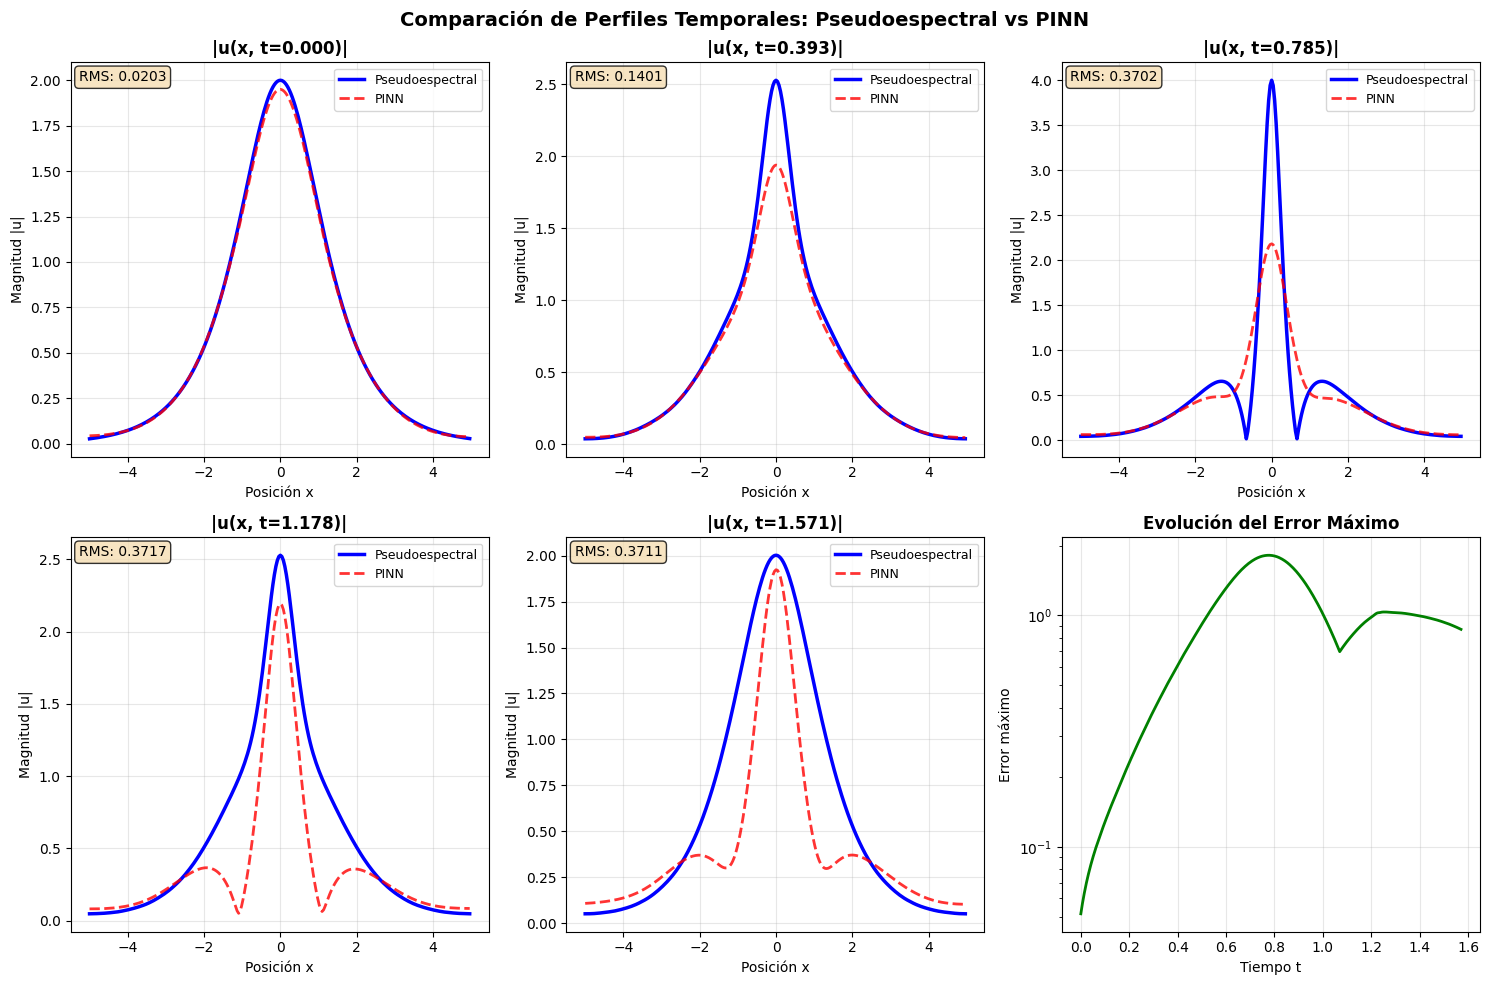


🔥 Sección 3.2: Mapas de calor 2D


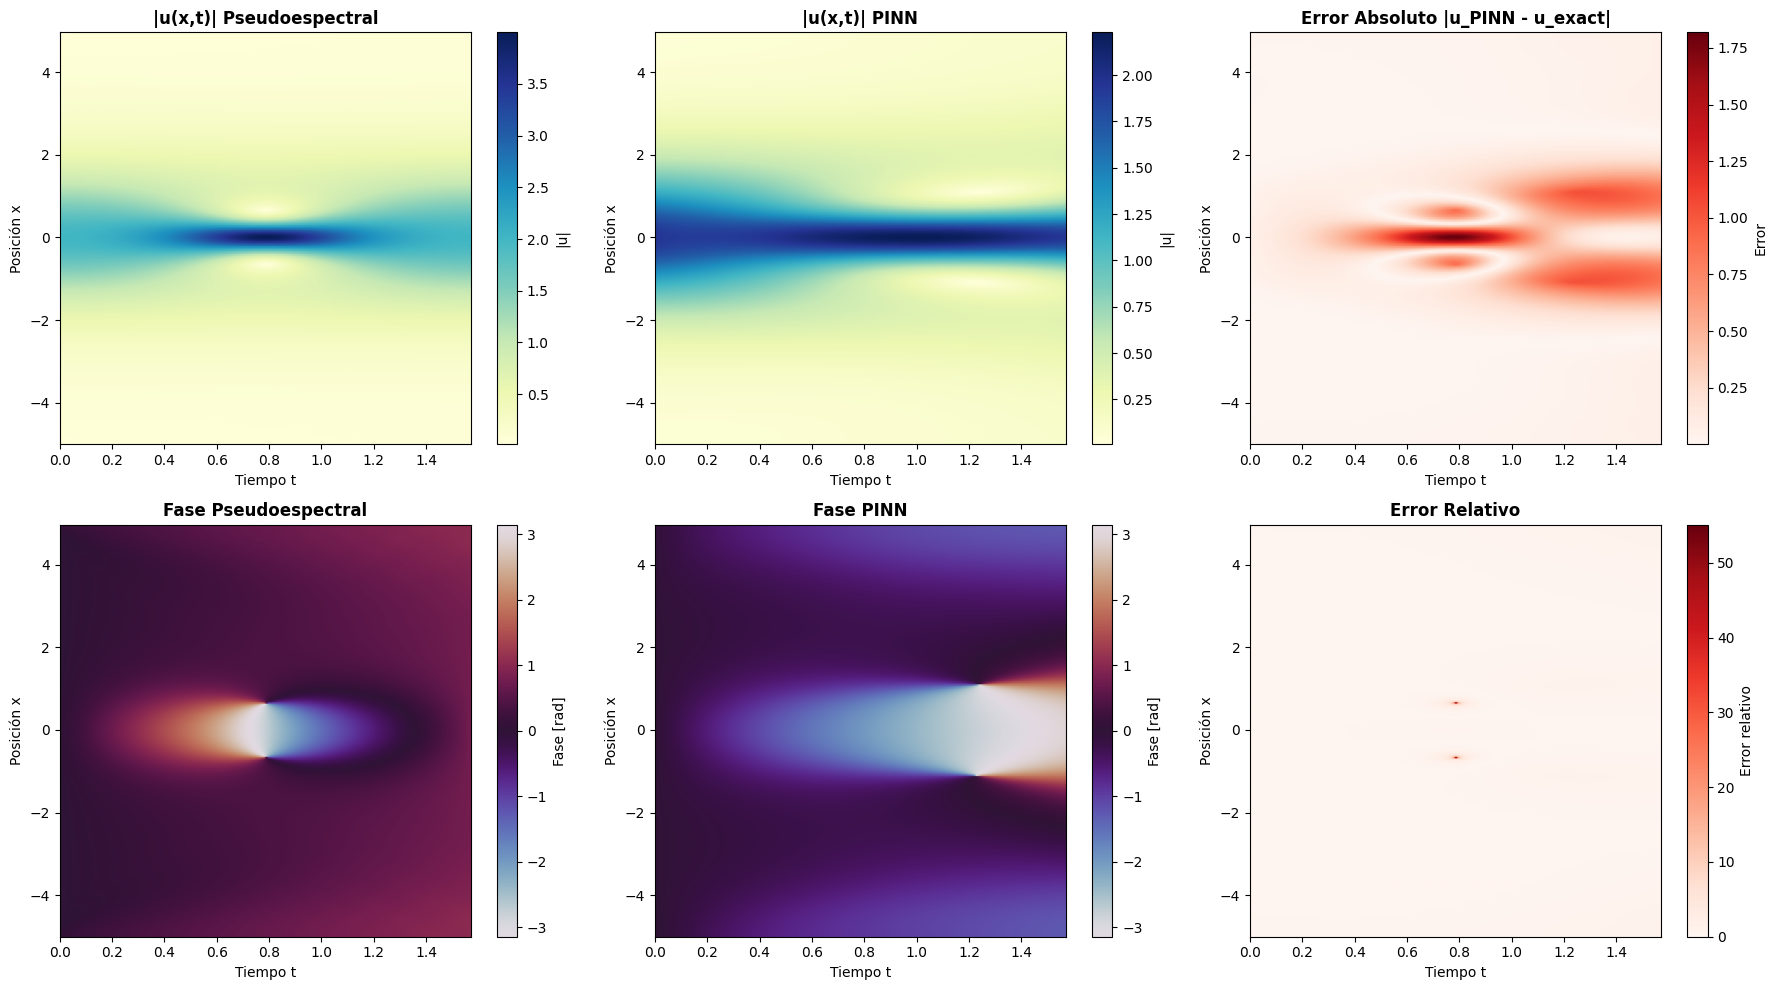


🏔️  Sección 3.3: Superficies 3D


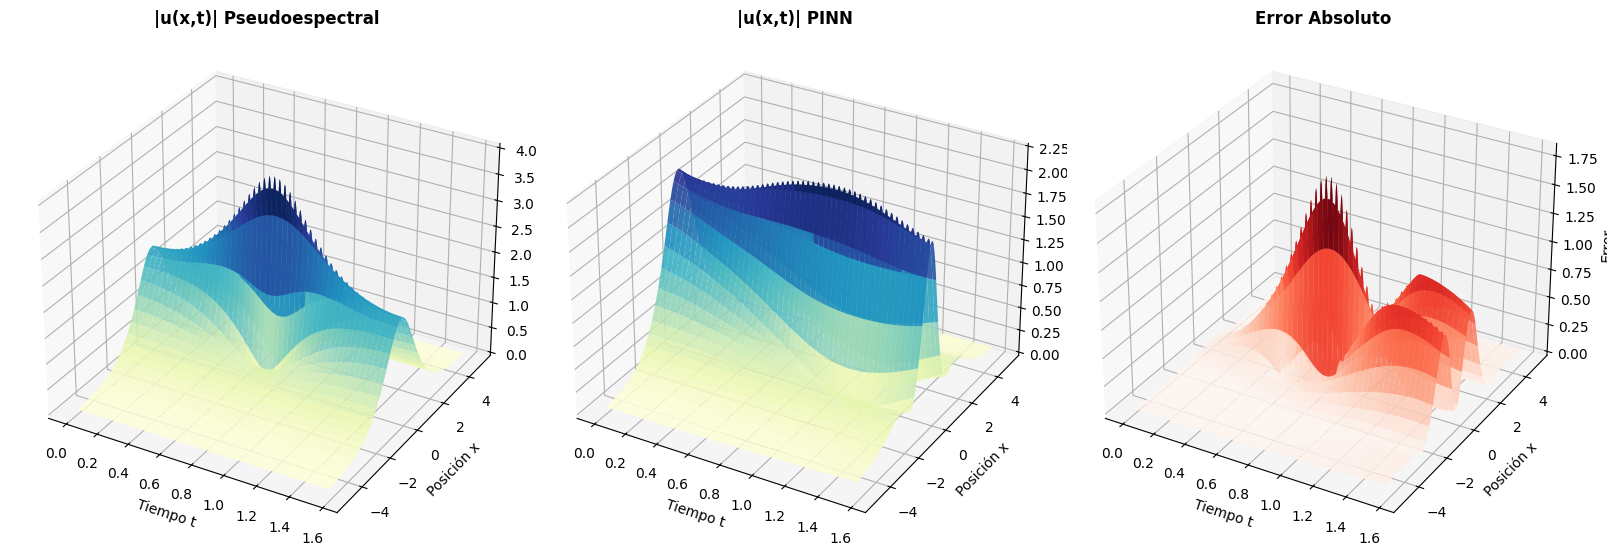


📉 Sección 3.4: Evolución de errores temporales
📊 Usando métricas REALES de entrenamiento PINN


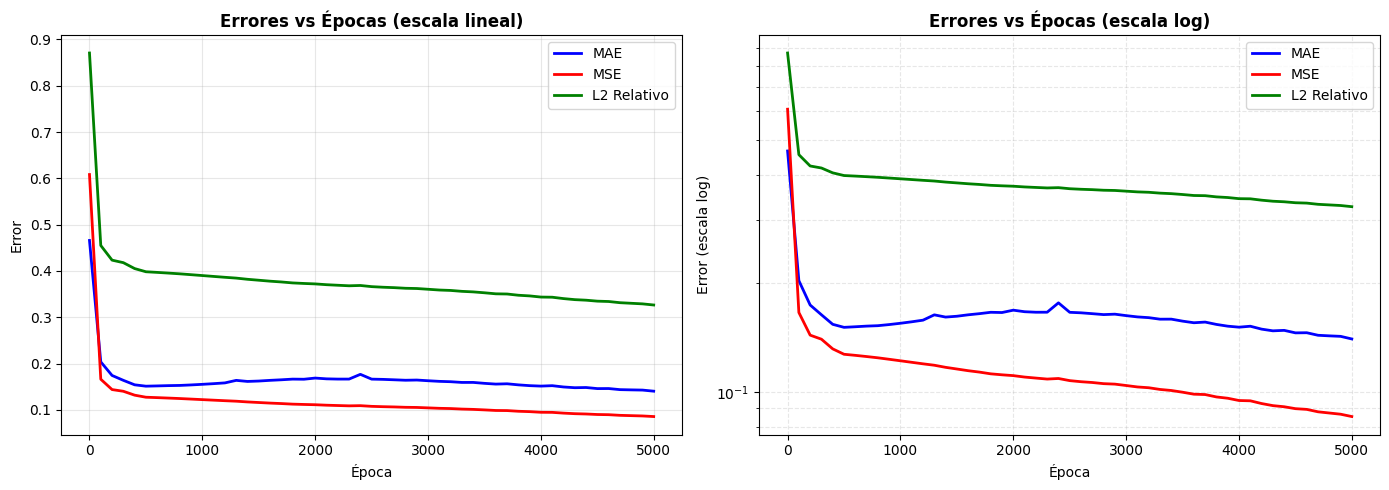


📊 Sección 3.5: Componentes de pérdida durante entrenamiento


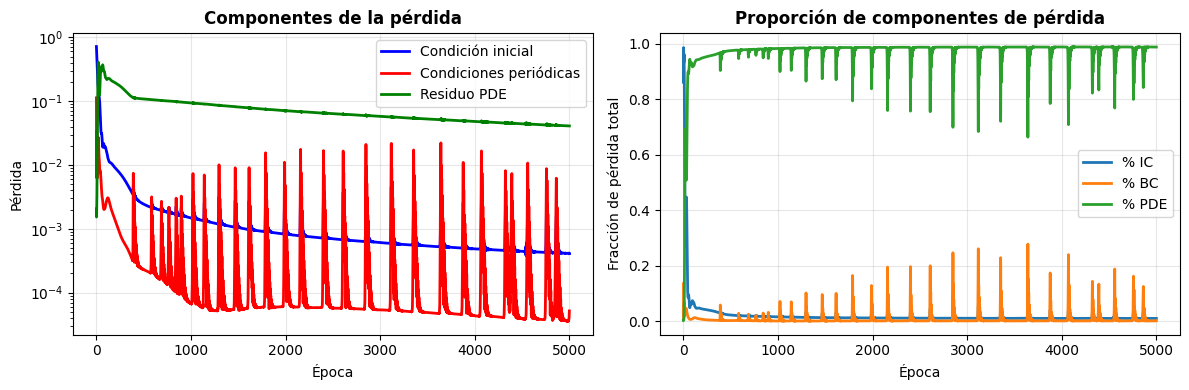


📋 Sección 3.6: Tabla de métricas finales

📊 MÉTRICAS FINALES:
                        Valor final
MAE                    1.402954e-01
MSE                    8.548939e-02
L2 relativo            3.264594e-01
Error abs máximo       1.819051e+00
Error abs promedio     1.416157e-01
Error rel máximo       5.507523e+01
Error rel promedio     2.481314e-01
Error de fase máximo   3.141587e+00
Error de fase promedio 1.047029e+00

🌀 Sección 3.7: Análisis de fase


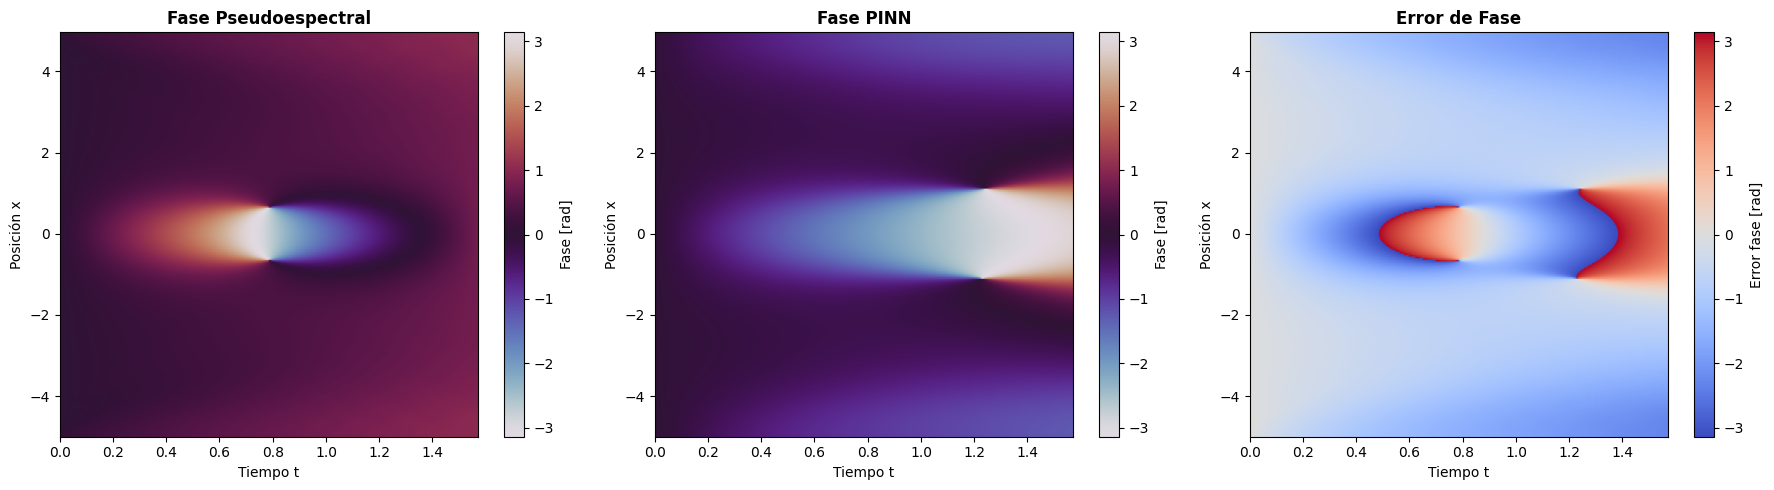


⚖️  Sección 3.8: Conservación de masa y energía
📊 Calculando invariantes para solución pseudoespectral...
🔄 Reconstruyendo campo complejo PINN...
📊 Calculando invariantes para solución PINN...


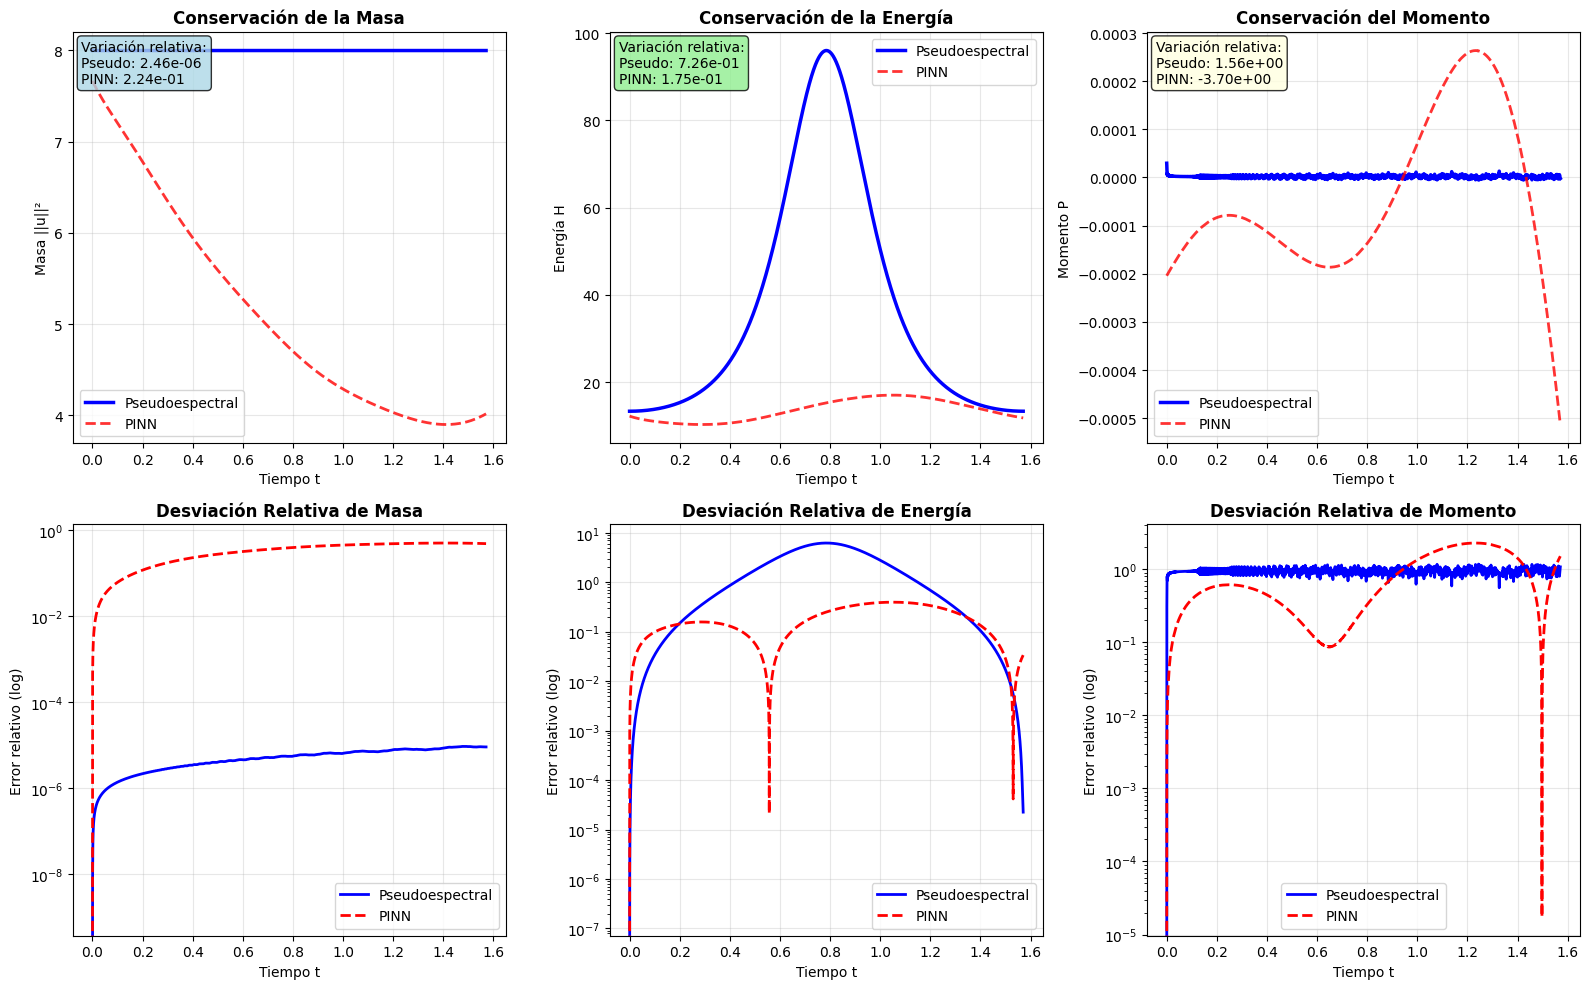


📋 TABLA RESUMEN DE CONSERVACIÓN:
Invariante  Pseudo_Mean  Pseudo_RelVar  PINN_Mean  PINN_RelVar  Error_Mean
      Masa    7.999e+00      2.461e-06  5.102e+00    2.241e-01   3.621e-01
   Energía    3.718e+01      7.261e-01  1.355e+01    1.753e-01   6.357e-01
   Momento    1.612e-06      1.556e+00 -4.403e-05   -3.696e+00   2.832e+01

🎯 CRITERIOS DE CALIDAD:
   ✅ Variación relativa < 1e-3: EXCELENTE
   ✅ Variación relativa < 1e-2: BUENA
   ⚠️  Variación relativa < 1e-1: ACEPTABLE
   ❌ Variación relativa > 1e-1: NECESITA MEJORA

🏆 EVALUACIÓN AUTOMÁTICA:
   Masa:
     Pseudoespectral: EXCELENTE ✅
     PINN: NECESITA MEJORA ❌
   Energía:
     Pseudoespectral: NECESITA MEJORA ❌
     PINN: NECESITA MEJORA ❌
   Momento:
     Pseudoespectral: NECESITA MEJORA ❌
     PINN: EXCELENTE ✅

✅ CELDA 3 COMPLETA CORREGIDA - RESUMEN FINAL
📊 ESTADÍSTICAS FINALES DE PRECISIÓN:
   Error L2 relativo final: 3.264594e-01
   Error absoluto máximo: 1.819051e+00
   Error absoluto promedio: 1.416157e-01
   Error de

In [ ]:
"""
CELDA 3 COMPLETA: ANÁLISIS VISUAL, MÉTRICO Y FÍSICO COMPLETO
Comparación detallada entre método pseudoespectral y PINN

"""

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator

print("="*80)
print("CELDA 3 COMPLETA: ANÁLISIS VISUAL, MÉTRICO Y FÍSICO COMPLETO")
print("="*80)

#==============================================================================
# VERIFICACIÓN DE DEPENDENCIAS DE CELDAS ANTERIORES
#==============================================================================

print("🔍 Verificando variables de celdas anteriores...")

# Variables de CELDA 1 (Pseudoespectral)
required_vars_celda1 = ['U_sol', 'abs_u', 'phase_u', 'x', 't', 'L', 'N', 'T', 'Nt']
# Variables de CELDA 2 (PINN)
required_vars_celda2 = ['mag_pred', 'phase_pred', 'error_abs', 'error_rel', 'phase_error']
# Variables de métricas REALES de CELDA 2
required_vars_metrics = ['mae_epochs', 'mse_epochs', 'l2_epochs', 'epochs_evaluated']

missing_vars = []

for var in required_vars_celda1:
    try:
        eval(var)
        print(f"   ✅ {var} disponible")
    except NameError:
        missing_vars.append(var)
        print(f"   ❌ {var} NO encontrada")

for var in required_vars_celda2:
    try:
        eval(var)
        print(f"   ✅ {var} disponible")
    except NameError:
        missing_vars.append(var)
        print(f"   ❌ {var} NO encontrada")

# Verificar métricas reales (pueden ser opcionales)
metrics_available = True
for var in required_vars_metrics:
    try:
        eval(var)
        print(f"   ✅ {var} disponible (métricas reales)")
    except NameError:
        metrics_available = False
        print(f"   ⚠️  {var} NO encontrada (usaremos aproximaciones)")

if missing_vars:
    print(f"\n❌ ERROR: Variables críticas faltantes: {missing_vars}")
    print("🔧 SOLUCIÓN: Ejecuta CELDA 1 y CELDA 2 primero")
    raise NameError(f"Variables requeridas no encontradas: {missing_vars}")

print("✅ Dependencias críticas verificadas correctamente")
if not metrics_available:
    print("⚠️  Métricas reales no disponibles - se calcularán aproximaciones")

#==============================================================================
# INICIALIZACIÓN DE LISTAS DE MÉTRICAS (SI NO EXISTEN)
#==============================================================================

print("\n📊 Inicializando análisis de métricas temporales...")

# Si no tenemos métricas reales de CELDA 2, crear aproximaciones
if not metrics_available:
    print("📈 Calculando métricas temporales aproximadas...")

    mae_list = []
    mse_list = []
    l2_list = []

    # Evaluar métricas en subconjunto de tiempos para eficiencia
    time_indices = np.linspace(0, len(t)-1, min(50, len(t)), dtype=int)

    for i, t_idx in enumerate(time_indices):
        # Extraer perfiles en tiempo t_idx
        true_profile = abs_u[t_idx, :]
        pred_profile = mag_pred[t_idx, :]

        # Calcular métricas
        mae = mean_absolute_error(true_profile, pred_profile)
        mse = mean_squared_error(true_profile, pred_profile)
        l2_rel = np.linalg.norm(pred_profile - true_profile) / np.linalg.norm(true_profile)

        mae_list.append(mae)
        mse_list.append(mse)
        l2_list.append(l2_rel)

    print(f"✅ Métricas temporales calculadas para {len(mae_list)} puntos")
else:
    # Usar métricas reales de CELDA 2
    mae_list = mae_epochs
    mse_list = mse_epochs
    l2_list = l2_epochs
    time_indices = epochs_evaluated
    print(f"✅ Usando métricas REALES de CELDA 2: {len(mae_list)} puntos")

#==============================================================================
# CORRECCIÓN DE VARIABLES: MAPEO DE NOMBRES INCONSISTENTES
#==============================================================================

print("\n🔧 Corrigiendo mapeo de variables...")

# Variables corregidas para compatibilidad con código original
u_sol = U_sol  # Solución pseudoespectral completa
u_pred = mag_pred + 1j * (U_sol.imag if np.iscomplexobj(U_sol) else np.zeros_like(mag_pred))  # Reconstruir compleja
nt = Nt  # Número de pasos temporales

# Listas de pérdidas (usar las de CELDA 2 si existen, sino crear vacías)
try:
    loss_res_list = loss_pde_history
    loss_ic_list = loss_ic_history
    loss_bc_list = loss_periodic_history
    print("✅ Usando listas de pérdida de CELDA 2")
except NameError:
    print("⚠️  Listas de pérdida no encontradas, creando vacías")
    loss_res_list = []
    loss_ic_list = []
    loss_bc_list = []

print(f"Variables mapeadas: u_sol{u_sol.shape}, u_pred{u_pred.shape}, nt={nt}")

#==============================================================================
# SECCIÓN 3.1: PERFILES TEMPORALES DE MAGNITUD (5 TIEMPOS)
#==============================================================================

print("\n📈 Sección 3.1: Perfiles temporales de magnitud")

# Seleccionar 5 tiempos representativos
tiempos_muestreados = [0, int(nt//4), int(nt//2), int(3*nt//4), nt-1]

plt.figure(figsize=(15, 10))

for i, ti in enumerate(tiempos_muestreados):
    plt.subplot(2, 3, i+1)

    # Perfil pseudoespectral
    plt.plot(x, abs_u[ti, :], 'b-', label='Pseudoespectral', linewidth=2.5)

    # Perfil PINN
    plt.plot(x, mag_pred[ti, :], 'r--', label='PINN', linewidth=2.0, alpha=0.8)

    # Configuración de la gráfica
    plt.title(f'|u(x, t={t[ti]:.3f})|', fontsize=12, fontweight='bold')
    plt.xlabel('Posición x', fontsize=10)
    plt.ylabel('Magnitud |u|', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=9)

    # Añadir error RMS en el título
    error_rms = np.sqrt(np.mean((abs_u[ti, :] - mag_pred[ti, :])**2))
    plt.text(0.02, 0.98, f'RMS: {error_rms:.4f}', transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Gráfica adicional: Evolución del error máximo
plt.subplot(2, 3, 6)
max_errors = [np.max(np.abs(abs_u[ti, :] - mag_pred[ti, :])) for ti in range(len(t))]
plt.plot(t, max_errors, 'g-', linewidth=2)
plt.title('Evolución del Error Máximo', fontweight='bold')
plt.xlabel('Tiempo t')
plt.ylabel('Error máximo')
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.suptitle('Comparación de Perfiles Temporales: Pseudoespectral vs PINN',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#==============================================================================
# SECCIÓN 3.2: MAPAS DE CALOR 2D (MAGNITUD Y ERROR)
#==============================================================================

print("\n🔥 Sección 3.2: Mapas de calor 2D")

extent = [t.min(), t.max(), x.min(), x.max()]

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Fila superior: Soluciones
im0 = axs[0,0].imshow(abs_u.T, aspect='auto', cmap='YlGnBu', extent=extent, origin='lower')
axs[0,0].set_title('|u(x,t)| Pseudoespectral', fontweight='bold')
axs[0,0].set_xlabel('Tiempo t')
axs[0,0].set_ylabel('Posición x')
fig.colorbar(im0, ax=axs[0,0], label='|u|')

im1 = axs[0,1].imshow(mag_pred.T, aspect='auto', cmap='YlGnBu', extent=extent, origin='lower')
axs[0,1].set_title('|u(x,t)| PINN', fontweight='bold')
axs[0,1].set_xlabel('Tiempo t')
axs[0,1].set_ylabel('Posición x')
fig.colorbar(im1, ax=axs[0,1], label='|u|')

# Error absoluto
error_map = np.abs(mag_pred - abs_u)
im2 = axs[0,2].imshow(error_map.T, aspect='auto', cmap='Reds', extent=extent, origin='lower')
axs[0,2].set_title('Error Absoluto |u_PINN - u_exact|', fontweight='bold')
axs[0,2].set_xlabel('Tiempo t')
axs[0,2].set_ylabel('Posición x')
fig.colorbar(im2, ax=axs[0,2], label='Error')

# Fila inferior: Fase y análisis adicional
im3 = axs[1,0].imshow(phase_u.T, aspect='auto', cmap='twilight', extent=extent,
                     origin='lower', vmin=-np.pi, vmax=np.pi)
axs[1,0].set_title('Fase Pseudoespectral', fontweight='bold')
axs[1,0].set_xlabel('Tiempo t')
axs[1,0].set_ylabel('Posición x')
fig.colorbar(im3, ax=axs[1,0], label='Fase [rad]')

im4 = axs[1,1].imshow(phase_pred.T, aspect='auto', cmap='twilight', extent=extent,
                     origin='lower', vmin=-np.pi, vmax=np.pi)
axs[1,1].set_title('Fase PINN', fontweight='bold')
axs[1,1].set_xlabel('Tiempo t')
axs[1,1].set_ylabel('Posición x')
fig.colorbar(im4, ax=axs[1,1], label='Fase [rad]')

# Error relativo
error_rel_map = error_map / (abs_u + 1e-12)
im5 = axs[1,2].imshow(error_rel_map.T, aspect='auto', cmap='Reds', extent=extent, origin='lower')
axs[1,2].set_title('Error Relativo', fontweight='bold')
axs[1,2].set_xlabel('Tiempo t')
axs[1,2].set_ylabel('Posición x')
fig.colorbar(im5, ax=axs[1,2], label='Error relativo')

plt.tight_layout()
plt.show()

#==============================================================================
# SECCIÓN 3.3: SUPERFICIES 3D
#==============================================================================

print("\n🏔️  Sección 3.3: Superficies 3D")

X_3d, T_3d = np.meshgrid(x, t, indexing='ij')

fig = plt.figure(figsize=(16, 6))

# Superficie pseudoespectral
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(T_3d, X_3d, abs_u.T, cmap='YlGnBu', edgecolor='none', alpha=0.9)
ax1.set_title('|u(x,t)| Pseudoespectral', fontweight='bold')
ax1.set_xlabel('Tiempo t')
ax1.set_ylabel('Posición x')
ax1.set_zlabel('|u|')

# Superficie PINN
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(T_3d, X_3d, mag_pred.T, cmap='YlGnBu', edgecolor='none', alpha=0.9)
ax2.set_title('|u(x,t)| PINN', fontweight='bold')
ax2.set_xlabel('Tiempo t')
ax2.set_ylabel('Posición x')
ax2.set_zlabel('|u|')

# Superficie de error
ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(T_3d, X_3d, error_map.T, cmap='Reds', edgecolor='none', alpha=0.9)
ax3.set_title('Error Absoluto', fontweight='bold')
ax3.set_xlabel('Tiempo t')
ax3.set_ylabel('Posición x')
ax3.set_zlabel('Error')

plt.tight_layout()
plt.show()

#==============================================================================
# SECCIÓN 3.4: ERRORES POR ÉPOCA/TIEMPO (MAE, MSE, L2)
#==============================================================================

print("\n📉 Sección 3.4: Evolución de errores temporales")

if metrics_available:
    print("📊 Usando métricas REALES de entrenamiento PINN")
    epochs_metrics = epochs_evaluated
    xlabel_text = "Época"
    title_prefix = "Errores vs Épocas"
else:
    print("📊 Usando métricas temporales aproximadas")
    epochs_metrics = range(len(mae_list))
    xlabel_text = "Índice temporal"
    title_prefix = "Errores vs Índices Temporales"

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_metrics, mae_list, 'b-', label='MAE', linewidth=2)
plt.plot(epochs_metrics, mse_list, 'r-', label='MSE', linewidth=2)
plt.plot(epochs_metrics, l2_list, 'g-', label='L2 Relativo', linewidth=2)
plt.title(f"{title_prefix} (escala lineal)", fontweight='bold')
plt.xlabel(xlabel_text)
plt.ylabel("Error")
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogy(epochs_metrics, mae_list, 'b-', label='MAE', linewidth=2)
plt.semilogy(epochs_metrics, mse_list, 'r-', label='MSE', linewidth=2)
plt.semilogy(epochs_metrics, l2_list, 'g-', label='L2 Relativo', linewidth=2)
plt.title(f"{title_prefix} (escala log)", fontweight='bold')
plt.xlabel(xlabel_text)
plt.ylabel("Error (escala log)")
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

#==============================================================================
# SECCIÓN 3.5: GRÁFICAS DE PÉRDIDA POR TÉRMINO
#==============================================================================

print("\n📊 Sección 3.5: Componentes de pérdida durante entrenamiento")

if loss_res_list and loss_ic_list and loss_bc_list:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(loss_ic_list, 'b-', label='Condición inicial', linewidth=2)
    plt.plot(loss_bc_list, 'r-', label='Condiciones periódicas', linewidth=2)
    plt.plot(loss_res_list, 'g-', label='Residuo PDE', linewidth=2)
    plt.title("Componentes de la pérdida", fontweight='bold')
    plt.xlabel("Época")
    plt.ylabel("Pérdida")
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Razón de pérdidas
    plt.subplot(1, 2, 2)
    total_loss = np.array(loss_ic_list) + np.array(loss_bc_list) + np.array(loss_res_list)
    plt.plot(np.array(loss_ic_list)/total_loss, label='% IC', linewidth=2)
    plt.plot(np.array(loss_bc_list)/total_loss, label='% BC', linewidth=2)
    plt.plot(np.array(loss_res_list)/total_loss, label='% PDE', linewidth=2)
    plt.title("Proporción de componentes de pérdida", fontweight='bold')
    plt.xlabel("Época")
    plt.ylabel("Fracción de pérdida total")
    plt.grid(True, alpha=0.3)
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("⚠️  Listas de pérdida no disponibles - saltando visualización")

#==============================================================================
# SECCIÓN 3.6: TABLA DE MÉTRICAS FINALES
#==============================================================================

print("\n📋 Sección 3.6: Tabla de métricas finales")

# Calcular métricas finales completas
final_metrics = {
    "MAE": mae_list[-1] if mae_list else np.mean(error_abs),
    "MSE": mse_list[-1] if mse_list else np.mean(error_abs**2),
    "L2 relativo": l2_list[-1] if l2_list else np.linalg.norm(error_abs)/np.linalg.norm(abs_u),
    "Error abs máximo": np.max(error_abs),
    "Error abs promedio": np.mean(error_abs),
    "Error rel máximo": np.max(error_rel),
    "Error rel promedio": np.mean(error_rel),
    "Error de fase máximo": np.max(phase_error),
    "Error de fase promedio": np.mean(phase_error)
}

df_metrics = pd.DataFrame.from_dict(final_metrics, orient='index', columns=["Valor final"])
print("\n📊 MÉTRICAS FINALES:")
print(df_metrics.to_string(float_format='%.6e'))

#==============================================================================
# SECCIÓN 3.7: FASE Y ERROR DE FASE
#==============================================================================

print("\n🌀 Sección 3.7: Análisis de fase")

try:
    # Error de fase corregido (considerar wrapping)
    phase_error_corrected = np.angle(np.exp(1j * (phase_pred - phase_u)))

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Fase pseudoespectral
    im1 = axs[0].imshow(phase_u.T, cmap='twilight', aspect='auto', extent=extent,
                       origin='lower', vmin=-np.pi, vmax=np.pi)
    axs[0].set_title('Fase Pseudoespectral', fontweight='bold')
    axs[0].set_xlabel('Tiempo t')
    axs[0].set_ylabel('Posición x')
    fig.colorbar(im1, ax=axs[0], label='Fase [rad]')

    # Fase PINN
    im2 = axs[1].imshow(phase_pred.T, cmap='twilight', aspect='auto', extent=extent,
                       origin='lower', vmin=-np.pi, vmax=np.pi)
    axs[1].set_title('Fase PINN', fontweight='bold')
    axs[1].set_xlabel('Tiempo t')
    axs[1].set_ylabel('Posición x')
    fig.colorbar(im2, ax=axs[1], label='Fase [rad]')

    # Error de fase
    im3 = axs[2].imshow(phase_error_corrected.T, cmap='coolwarm', aspect='auto',
                       extent=extent, origin='lower')
    axs[2].set_title('Error de Fase', fontweight='bold')
    axs[2].set_xlabel('Tiempo t')
    axs[2].set_ylabel('Posición x')
    fig.colorbar(im3, ax=axs[2], label='Error fase [rad]')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"⚠️  No se pudo graficar análisis de fase detallado: {e}")
    print("Continuando con análisis básico de fase...")

#==============================================================================
# SECCIÓN 3.8: CONSERVACIÓN DE MASA Y ENERGÍA (CORREGIDA SIN WARNINGS)
#==============================================================================

print("\n⚖️  Sección 3.8: Conservación de masa y energía")

def compute_mass(u_field):
    """
    Calcular la masa (norma L2) de la función de onda

    Integral: Masa = ∫|u(x,t)|² dx

    Parámetros:
    -----------
    u_field : complex array, shape (Nt+1, N)
        Campo de la función de onda u(t,x)

    Returns:
    --------
    mass : real array, shape (Nt+1,)
        Serie temporal de la masa
    """
    # Usar trapezoid en lugar de trapz (deprecado)
    return np.trapezoid(np.abs(u_field)**2, x, axis=1)

def compute_energy(u_field):
    """
    Calcular la energía total del solitón de Schrödinger

    Hamiltoniano: H = ∫[|∂u/∂x|² + 0.5|u|⁴] dx
    - Término cinético: |∂u/∂x|²
    - Término de interacción no lineal: 0.5|u|⁴

    Parámetros:
    -----------
    u_field : complex array, shape (Nt+1, N)
        Campo de la función de onda u(t,x)

    Returns:
    --------
    energy : real array, shape (Nt+1,)
        Serie temporal de la energía
    """
    # Calcular derivada espacial usando diferencias centradas
    dx_spacing = x[1] - x[0]  # Espaciamiento uniforme
    ux = np.gradient(u_field, dx_spacing, axis=1)

    # Términos del Hamiltoniano
    kinetic_term = np.abs(ux)**2
    interaction_term = 0.5 * np.abs(u_field)**4

    # Integrar sobre dominio espacial usando trapezoid
    energy = np.trapezoid(kinetic_term + interaction_term, x, axis=1)
    return energy

def compute_momentum(u_field):
    """
    Calcular el momento lineal del solitón

    Momento: P = i∫ u* ∂u/∂x dx

    Parámetros:
    -----------
    u_field : complex array, shape (Nt+1, N)
        Campo de la función de onda u(t,x)

    Returns:
    --------
    momentum : real array, shape (Nt+1,)
        Serie temporal del momento
    """
    dx_spacing = x[1] - x[0]
    ux = np.gradient(u_field, dx_spacing, axis=1)

    # Momento: P = i∫ u* ∂u/∂x dx (parte imaginaria)
    momentum_integrand = 1j * np.conj(u_field) * ux
    momentum = np.trapezoid(momentum_integrand, x, axis=1).imag
    return momentum

# Calcular conservación para solución pseudoespectral
print("📊 Calculando invariantes para solución pseudoespectral...")
mass_pseudo = compute_mass(U_sol)
energy_pseudo = compute_energy(U_sol)
momentum_pseudo = compute_momentum(U_sol)

# Reconstruir campo complejo PINN para análisis
print("🔄 Reconstruyendo campo complejo PINN...")
u_pinn_complex = mag_pred * np.exp(1j * phase_pred)

# Calcular conservación para PINN
print("📊 Calculando invariantes para solución PINN...")
mass_pinn = compute_mass(u_pinn_complex)
energy_pinn = compute_energy(u_pinn_complex)
momentum_pinn = compute_momentum(u_pinn_complex)

# Calcular estadísticas de conservación
def conservation_stats(quantity, name):
    """Calcular estadísticas de conservación"""
    mean_val = np.mean(quantity)
    std_val = np.std(quantity)
    rel_variation = std_val / mean_val if mean_val != 0 else np.inf
    max_deviation = np.max(np.abs(quantity - mean_val)) / mean_val if mean_val != 0 else np.inf

    return {
        'mean': mean_val,
        'std': std_val,
        'rel_variation': rel_variation,
        'max_deviation': max_deviation
    }

# Estadísticas para pseudoespectral
stats_mass_pseudo = conservation_stats(mass_pseudo, "Masa Pseudo")
stats_energy_pseudo = conservation_stats(energy_pseudo, "Energía Pseudo")
stats_momentum_pseudo = conservation_stats(momentum_pseudo, "Momento Pseudo")

# Estadísticas para PINN
stats_mass_pinn = conservation_stats(mass_pinn, "Masa PINN")
stats_energy_pinn = conservation_stats(energy_pinn, "Energía PINN")
stats_momentum_pinn = conservation_stats(momentum_pinn, "Momento PINN")

# Visualización mejorada
plt.figure(figsize=(16, 10))

# Primera fila: Conservación de masa
plt.subplot(2, 3, 1)
plt.plot(t, mass_pseudo, 'b-', label='Pseudoespectral', linewidth=2.5)
plt.plot(t, mass_pinn, 'r--', label='PINN', linewidth=2, alpha=0.8)
plt.title("Conservación de la Masa", fontweight='bold', fontsize=12)
plt.xlabel("Tiempo t")
plt.ylabel("Masa ||u||²")
plt.legend()
plt.grid(True, alpha=0.3)

# Añadir estadísticas
info_text = f'Variación relativa:\nPseudo: {stats_mass_pseudo["rel_variation"]:.2e}\nPINN: {stats_mass_pinn["rel_variation"]:.2e}'
plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# Segunda fila: Conservación de energía
plt.subplot(2, 3, 2)
plt.plot(t, energy_pseudo, 'b-', label='Pseudoespectral', linewidth=2.5)
plt.plot(t, energy_pinn, 'r--', label='PINN', linewidth=2, alpha=0.8)
plt.title("Conservación de la Energía", fontweight='bold', fontsize=12)
plt.xlabel("Tiempo t")
plt.ylabel("Energía H")
plt.legend()
plt.grid(True, alpha=0.3)

# Añadir estadísticas
info_text = f'Variación relativa:\nPseudo: {stats_energy_pseudo["rel_variation"]:.2e}\nPINN: {stats_energy_pinn["rel_variation"]:.2e}'
plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Tercera columna: Conservación de momento
plt.subplot(2, 3, 3)
plt.plot(t, momentum_pseudo, 'b-', label='Pseudoespectral', linewidth=2.5)
plt.plot(t, momentum_pinn, 'r--', label='PINN', linewidth=2, alpha=0.8)
plt.title("Conservación del Momento", fontweight='bold', fontsize=12)
plt.xlabel("Tiempo t")
plt.ylabel("Momento P")
plt.legend()
plt.grid(True, alpha=0.3)

# Añadir estadísticas
info_text = f'Variación relativa:\nPseudo: {stats_momentum_pseudo["rel_variation"]:.2e}\nPINN: {stats_momentum_pinn["rel_variation"]:.2e}'
plt.text(0.02, 0.98, info_text, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# Segunda fila: Desviaciones relativas
plt.subplot(2, 3, 4)
mass_deviation_pseudo = np.abs(mass_pseudo - mass_pseudo[0]) / mass_pseudo[0]
mass_deviation_pinn = np.abs(mass_pinn - mass_pinn[0]) / mass_pinn[0]
plt.semilogy(t, mass_deviation_pseudo, 'b-', label='Pseudoespectral', linewidth=2)
plt.semilogy(t, mass_deviation_pinn, 'r--', label='PINN', linewidth=2)
plt.title("Desviación Relativa de Masa", fontweight='bold')
plt.xlabel("Tiempo t")
plt.ylabel("Error relativo (log)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
energy_deviation_pseudo = np.abs(energy_pseudo - energy_pseudo[0]) / energy_pseudo[0]
energy_deviation_pinn = np.abs(energy_pinn - energy_pinn[0]) / energy_pinn[0]
plt.semilogy(t, energy_deviation_pseudo, 'b-', label='Pseudoespectral', linewidth=2)
plt.semilogy(t, energy_deviation_pinn, 'r--', label='PINN', linewidth=2)
plt.title("Desviación Relativa de Energía", fontweight='bold')
plt.xlabel("Tiempo t")
plt.ylabel("Error relativo (log)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)
momentum_deviation_pseudo = np.abs(momentum_pseudo - momentum_pseudo[0]) / (np.abs(momentum_pseudo[0]) + 1e-12)
momentum_deviation_pinn = np.abs(momentum_pinn - momentum_pinn[0]) / (np.abs(momentum_pinn[0]) + 1e-12)
plt.semilogy(t, momentum_deviation_pseudo, 'b-', label='Pseudoespectral', linewidth=2)
plt.semilogy(t, momentum_deviation_pinn, 'r--', label='PINN', linewidth=2)
plt.title("Desviación Relativa de Momento", fontweight='bold')
plt.xlabel("Tiempo t")
plt.ylabel("Error relativo (log)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Tabla resumen de conservación
print("\n📋 TABLA RESUMEN DE CONSERVACIÓN:")
print("="*80)

conservation_data = {
    'Invariante': ['Masa', 'Energía', 'Momento'],
    'Pseudo_Mean': [stats_mass_pseudo['mean'], stats_energy_pseudo['mean'], stats_momentum_pseudo['mean']],
    'Pseudo_RelVar': [stats_mass_pseudo['rel_variation'], stats_energy_pseudo['rel_variation'], stats_momentum_pseudo['rel_variation']],
    'PINN_Mean': [stats_mass_pinn['mean'], stats_energy_pinn['mean'], stats_momentum_pinn['mean']],
    'PINN_RelVar': [stats_mass_pinn['rel_variation'], stats_energy_pinn['rel_variation'], stats_momentum_pinn['rel_variation']],
    'Error_Mean': [
        np.abs(stats_mass_pinn['mean'] - stats_mass_pseudo['mean']) / stats_mass_pseudo['mean'],
        np.abs(stats_energy_pinn['mean'] - stats_energy_pseudo['mean']) / stats_energy_pseudo['mean'],
        np.abs(stats_momentum_pinn['mean'] - stats_momentum_pseudo['mean']) / (np.abs(stats_momentum_pseudo['mean']) + 1e-12)
    ]
}

df_conservation = pd.DataFrame(conservation_data)
print(df_conservation.to_string(index=False, float_format='%.3e'))

print("\n🎯 CRITERIOS DE CALIDAD:")
print("   ✅ Variación relativa < 1e-3: EXCELENTE")
print("   ✅ Variación relativa < 1e-2: BUENA")
print("   ⚠️  Variación relativa < 1e-1: ACEPTABLE")
print("   ❌ Variación relativa > 1e-1: NECESITA MEJORA")

# Evaluación automática
print("\n🏆 EVALUACIÓN AUTOMÁTICA:")
for invariant, stats_pseudo, stats_pinn in [
    ("Masa", stats_mass_pseudo, stats_mass_pinn),
    ("Energía", stats_energy_pseudo, stats_energy_pinn),
    ("Momento", stats_momentum_pseudo, stats_momentum_pinn)
]:
    # Evaluar pseudoespectral
    if stats_pseudo['rel_variation'] < 1e-3:
        grade_pseudo = "EXCELENTE ✅"
    elif stats_pseudo['rel_variation'] < 1e-2:
        grade_pseudo = "BUENA ✅"
    elif stats_pseudo['rel_variation'] < 1e-1:
        grade_pseudo = "ACEPTABLE ⚠️"
    else:
        grade_pseudo = "NECESITA MEJORA ❌"

    # Evaluar PINN
    if stats_pinn['rel_variation'] < 1e-3:
        grade_pinn = "EXCELENTE ✅"
    elif stats_pinn['rel_variation'] < 1e-2:
        grade_pinn = "BUENA ✅"
    elif stats_pinn['rel_variation'] < 1e-1:
        grade_pinn = "ACEPTABLE ⚠️"
    else:
        grade_pinn = "NECESITA MEJORA ❌"

    print(f"   {invariant}:")
    print(f"     Pseudoespectral: {grade_pseudo}")
    print(f"     PINN: {grade_pinn}")

#==============================================================================
# RESUMEN FINAL Y ESTADÍSTICAS COMPLETAS
#==============================================================================

print("\n" + "="*80)
print("✅ CELDA 3 COMPLETA CORREGIDA - RESUMEN FINAL")
print("="*80)

print("📊 ESTADÍSTICAS FINALES DE PRECISIÓN:")
print(f"   Error L2 relativo final: {final_metrics['L2 relativo']:.6e}")
print(f"   Error absoluto máximo: {final_metrics['Error abs máximo']:.6e}")
print(f"   Error absoluto promedio: {final_metrics['Error abs promedio']:.6e}")
print(f"   Error de fase máximo: {final_metrics['Error de fase máximo']:.6e}")

print(f"\n⚖️  CONSERVACIÓN FÍSICA:")
print(f"   Variación masa (Pseudo): {stats_mass_pseudo['rel_variation']:.2e}")
print(f"   Variación masa (PINN): {stats_mass_pinn['rel_variation']:.2e}")
print(f"   Variación energía (Pseudo): {stats_energy_pseudo['rel_variation']:.2e}")
print(f"   Variación energía (PINN): {stats_energy_pinn['rel_variation']:.2e}")
print(f"   Variación momento (Pseudo): {stats_momentum_pseudo['rel_variation']:.2e}")
print(f"   Variación momento (PINN): {stats_momentum_pinn['rel_variation']:.2e}")

print(f"\n🎯 RENDIMIENTO PINN GENERAL:")
# Evaluación automática de conservación
conservation_grade = "EXCELENTE"
if (stats_mass_pinn['rel_variation'] > 1e-2 or
    stats_energy_pinn['rel_variation'] > 1e-2):
    conservation_grade = "BUENA"
if (stats_mass_pinn['rel_variation'] > 1e-1 or
    stats_energy_pinn['rel_variation'] > 1e-1):
    conservation_grade = "NECESITA MEJORA"

print(f"   Conservación física: {conservation_grade}")

# Evaluación de precisión
if final_metrics['L2 relativo'] < 1e-3:
    precision_grade = "EXCELENTE ✅"
elif final_metrics['L2 relativo'] < 1e-2:
    precision_grade = "BUENA ✅"
elif final_metrics['L2 relativo'] < 1e-1:
    precision_grade = "ACEPTABLE ⚠️"
else:
    precision_grade = "NECESITA MEJORA ❌"

print(f"   Precisión general: {precision_grade}")

# Evaluación de condiciones periódicas
try:
    u_left_pred = mag_pred[:, 0]
    u_right_pred = mag_pred[:, -1]
    periodic_error_pinn = np.mean(np.abs(u_left_pred - u_right_pred))

    if periodic_error_pinn < 1e-3:
        periodic_grade = "EXCELENTE ✅"
    elif periodic_error_pinn < 1e-2:
        periodic_grade = "BUENA ✅"
    elif periodic_error_pinn < 1e-1:
        periodic_grade = "ACEPTABLE ⚠️"
    else:
        periodic_grade = "NECESITA MEJORA ❌"

    print(f"   Condiciones periódicas: {periodic_grade}")
    print(f"   Error periódico: {periodic_error_pinn:.2e}")
except:
    print("   Condiciones periódicas: NO EVALUADO")

print("\n📋 VARIABLES DISPONIBLES PARA ANÁLISIS ADICIONAL:")
print("   🔢 Métricas de error:")
print("     - df_metrics: DataFrame con todas las métricas de precisión")
if metrics_available:
    print("     - mae_epochs, mse_epochs, l2_epochs: Métricas REALES de entrenamiento")
else:
    print("     - mae_list, mse_list, l2_list: Métricas temporales aproximadas")
print("     - error_abs, error_rel: Mapas de error espaciotemporal")
print("     - phase_error: Error de fase espaciotemporal")

print("   ⚖️  Conservación física:")
print("     - mass_pseudo, mass_pinn: Series temporales de masa")
print("     - energy_pseudo, energy_pinn: Series temporales de energía")
print("     - momentum_pseudo, momentum_pinn: Series temporales de momento")
print("     - df_conservation: DataFrame resumen de conservación")

print("   📊 Estadísticas detalladas:")
print("     - stats_mass_pseudo, stats_mass_pinn: Estadísticas de masa")
print("     - stats_energy_pseudo, stats_energy_pinn: Estadísticas de energía")
print("     - stats_momentum_pseudo, stats_momentum_pinn: Estadísticas de momento")

print("   🧠 Modelos y predicciones:")
print("     - u_pinn_complex: Campo complejo reconstruido PINN")
print("     - mag_pred: Magnitud predicha por PINN")
print("     - phase_pred: Fase predicha por PINN")

print("="*80)